# Projeto

## Setup Inicial e carregamento da base de dados.

In [3]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Carregar dados
df = pd.read_csv('diabetes_binary_health_indicators_BRFSS2015.csv')

In [7]:
df

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


## Divisão entre treino e testes. Mantendo a proporção original (feita após ver o balanceamento das clases)

In [43]:
X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,   # 20% para teste
    random_state=42, # para reprodutibilidade
    stratify=y       # mantém proporção das classes
)

In [45]:
y.value_counts(normalize=True),

(Diabetes_binary
 0.0    0.860667
 1.0    0.139333
 Name: proportion, dtype: float64,)

In [46]:
y_train.value_counts(normalize=True),

(Diabetes_binary
 0.0    0.860666
 1.0    0.139334
 Name: proportion, dtype: float64,)

In [47]:
y_test.value_counts(normalize=True)

Diabetes_binary
0.0    0.860671
1.0    0.139329
Name: proportion, dtype: float64

## Exploração inicial dos dados.

In [48]:
## verificando a forma.

In [67]:
X_train.shape

(202944, 21)

In [50]:
## verificando o nome da cada coluna. 

In [68]:
X_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [52]:
## verificando tipos

In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202944 entries, 153147 to 206060
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                202944 non-null  float64
 1   HighChol              202944 non-null  float64
 2   CholCheck             202944 non-null  float64
 3   BMI                   202944 non-null  float64
 4   Smoker                202944 non-null  float64
 5   Stroke                202944 non-null  float64
 6   HeartDiseaseorAttack  202944 non-null  float64
 7   PhysActivity          202944 non-null  float64
 8   Fruits                202944 non-null  float64
 9   Veggies               202944 non-null  float64
 10  HvyAlcoholConsump     202944 non-null  float64
 11  AnyHealthcare         202944 non-null  float64
 12  NoDocbcCost           202944 non-null  float64
 13  GenHlth               202944 non-null  float64
 14  MentHlth              202944 non-null  float64
 15  

In [54]:
## Vendo assim podemos notar que existem muitos valores binarios na base de dados.

In [70]:
X_train.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.428995,0.424304,0.962418,28.377961,0.442861,0.040405,0.094248,0.756992,0.634426,0.811426,...,0.951149,0.084624,2.511836,3.189796,4.250818,0.168160,0.441013,8.032827,5.049925,6.050832
std,0.494934,0.494238,0.190183,6.598293,0.496726,0.196908,0.292174,0.428901,0.481592,0.391171,...,0.215557,0.278323,1.068378,7.417614,8.725646,0.374009,0.496510,3.051388,0.986384,2.072661
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [71]:
# Verificar se há valores nulos. 
X_train.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [57]:
## Verificando o balanceamento das clases. 

Diabetes_binary
0.0    0.860667
1.0    0.139333
Name: proportion, dtype: float64


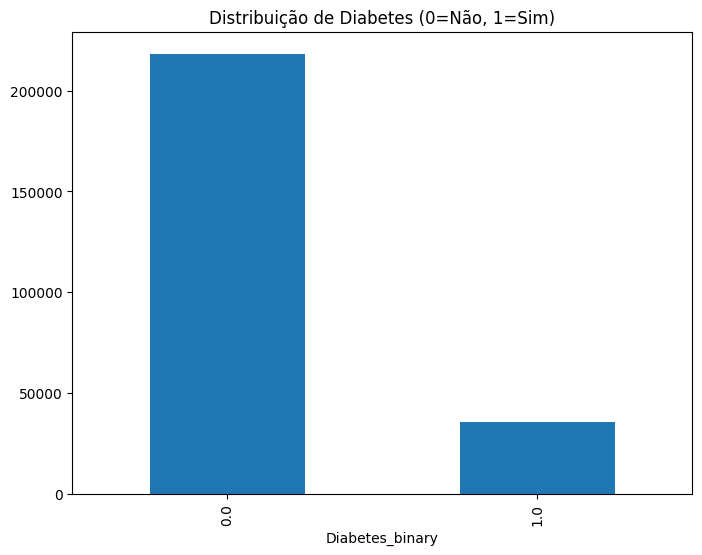

In [78]:


# Distribuição da target
print(df['Diabetes_binary'].value_counts(normalize=True))
plt.figure(figsize=(8,6))
df['Diabetes_binary'].value_counts().plot(kind='bar')
plt.title('Distribuição de Diabetes (0=Não, 1=Sim)')
plt.show()

In [60]:
## A classe alvo é muito desbalanceada. 

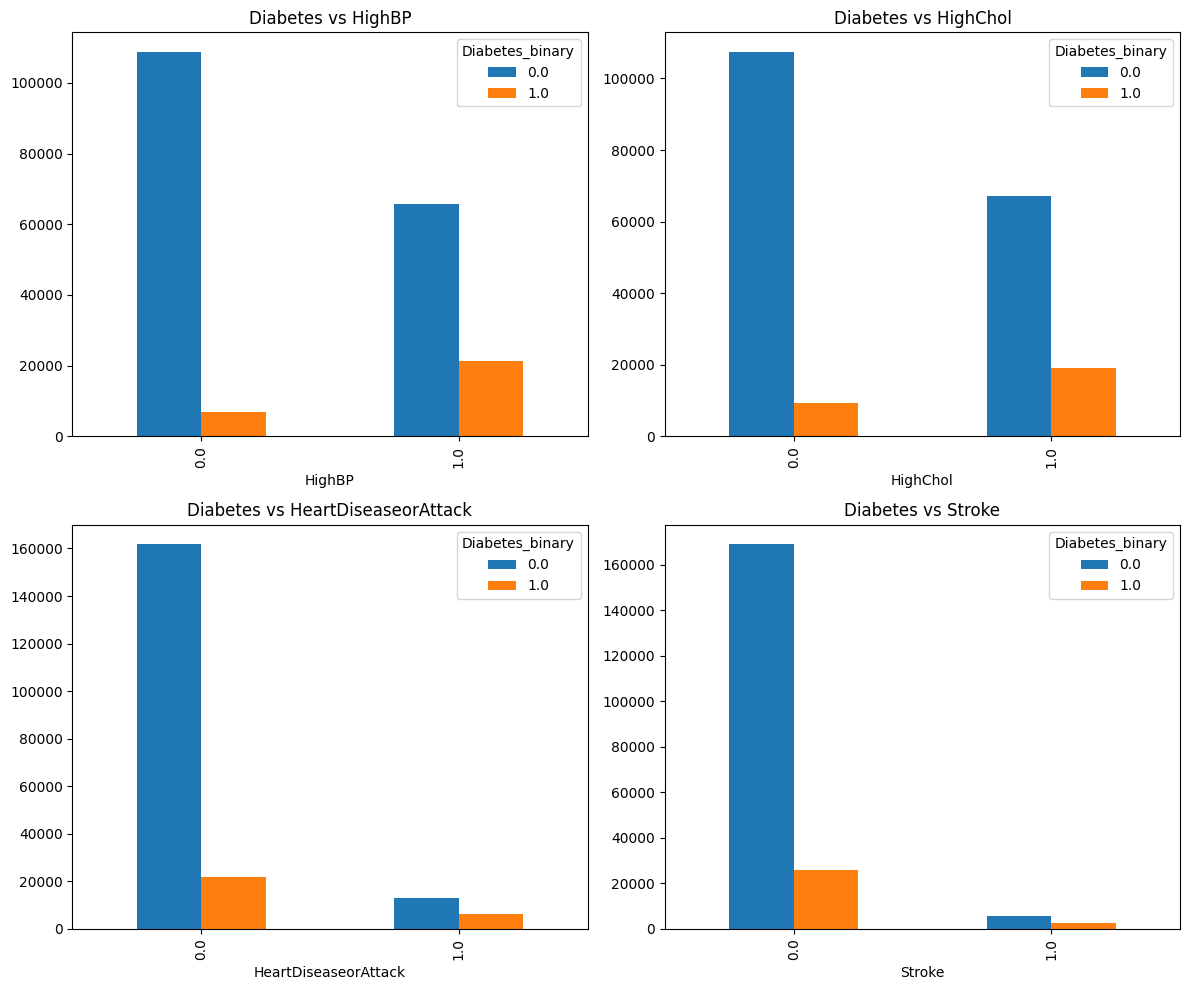

In [79]:
# Analisar comorbidades principais
comorbidades = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke']

fig, axes = plt.subplots(2, 2, figsize=(12,10))
for i, col in enumerate(comorbidades):
    ax = axes[i//2, i%2]
    pd.crosstab(X_train[col], y_train).plot(kind='bar', ax=ax)
    ax.set_title(f'Diabetes vs {col}')
plt.tight_layout()
plt.show()

Aqui podemos ver que pessoas com HighBP e HighCol prorpocionalmente tem mais diabetes. Isso pode ser util mais para frente para fazer o feature engering

Analise da corelação dos dados.

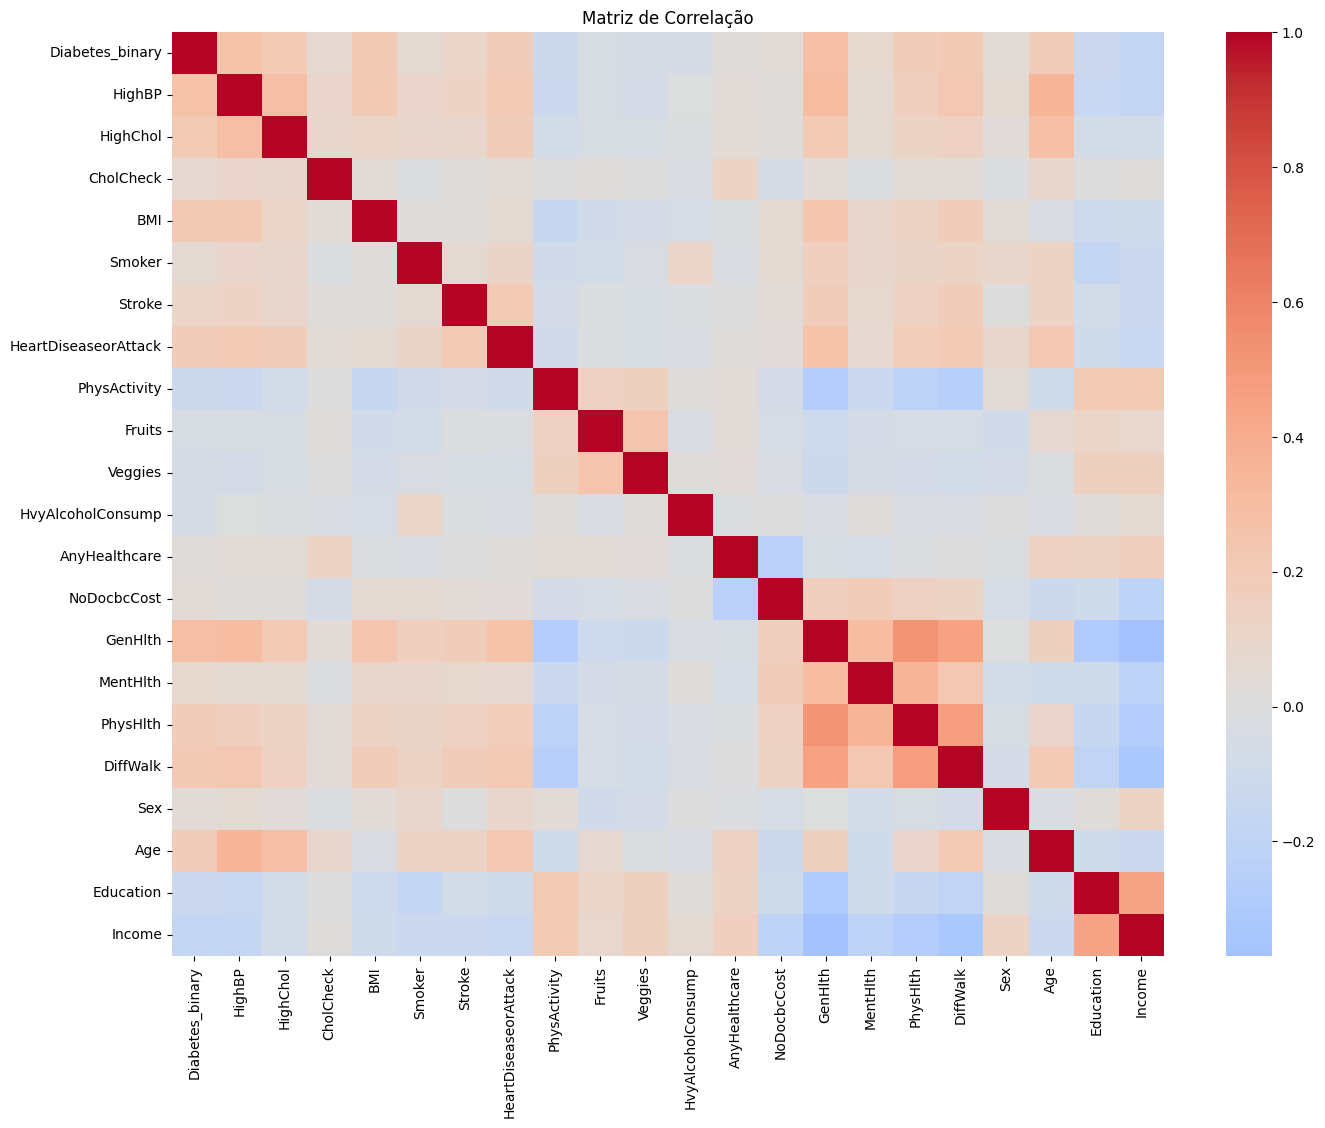

Correlações com Diabetes:
Diabetes_binary         1.000000
GenHlth                 0.293569
HighBP                  0.263129
DiffWalk                0.218344
BMI                     0.216843
HighChol                0.200276
Age                     0.177442
HeartDiseaseorAttack    0.177282
PhysHlth                0.171337
Stroke                  0.105816
MentHlth                0.069315
CholCheck               0.064761
Smoker                  0.060789
NoDocbcCost             0.031433
Sex                     0.031430
AnyHealthcare           0.016255
Fruits                 -0.040779
Veggies                -0.056584
HvyAlcoholConsump      -0.057056
PhysActivity           -0.118133
Education              -0.124456
Income                 -0.163919
Name: Diabetes_binary, dtype: float64


In [80]:
# Matriz de correlação
plt.figure(figsize=(16,12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação')
plt.show()

# Correlações com target
target_corr = corr_matrix['Diabetes_binary'].sort_values(ascending=False)
print("Correlações com Diabetes:")
print(target_corr)

ANÁLISE COMPLETA DE CORRELAÇÕES


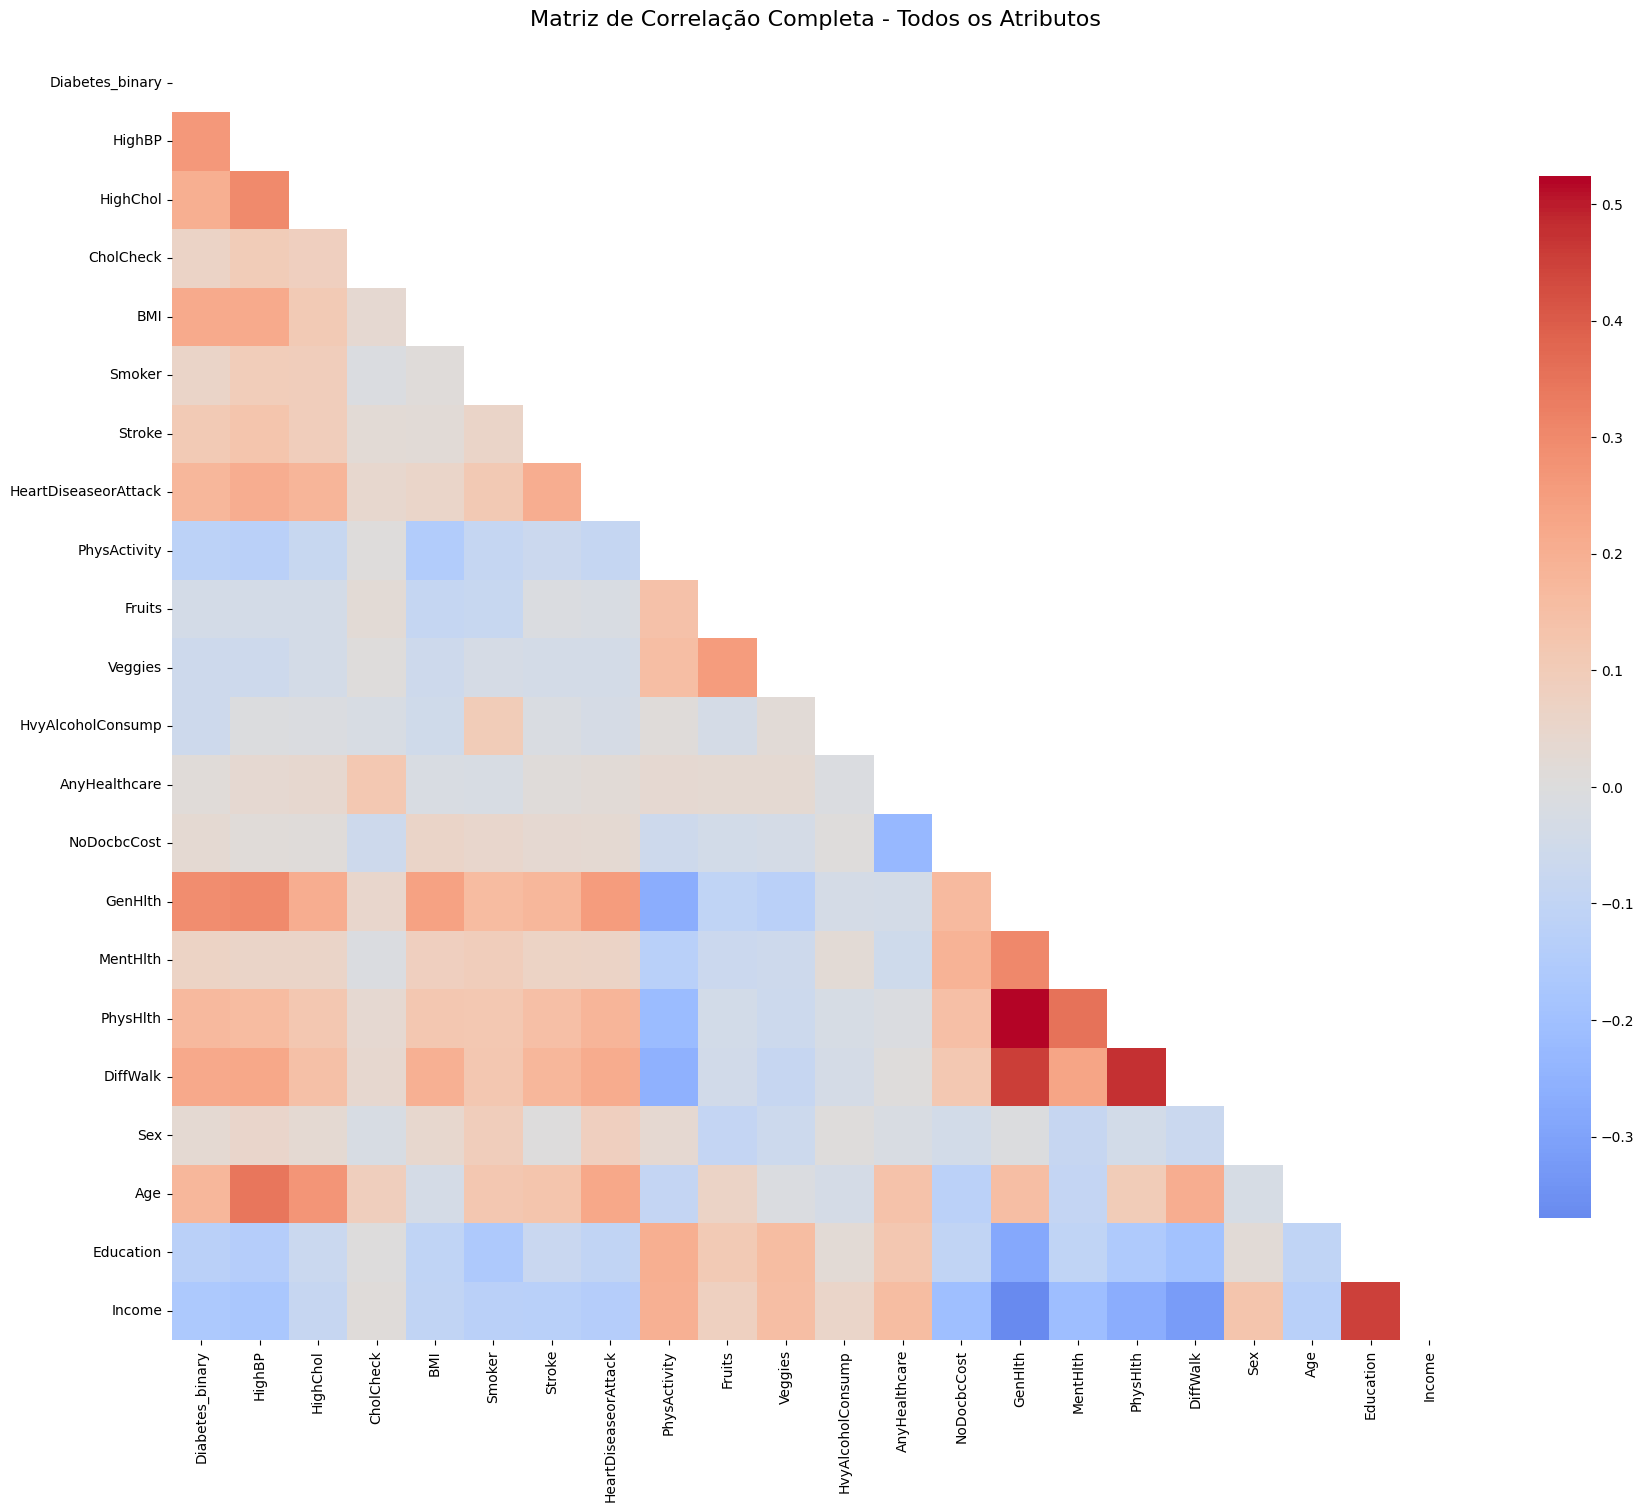


🎯 CORRELAÇÕES COM A VARIÁVEL TARGET (Diabetes_binary)
------------------------------------------------------------
GenHlth                   :  0.2936 ↑ POSITIVA (MODERADA)
HighBP                    :  0.2631 ↑ POSITIVA (MODERADA)
DiffWalk                  :  0.2183 ↑ POSITIVA (MODERADA)
BMI                       :  0.2168 ↑ POSITIVA (MODERADA)
HighChol                  :  0.2003 ↑ POSITIVA (MODERADA)
Age                       :  0.1774 ↑ POSITIVA (MODERADA)
HeartDiseaseorAttack      :  0.1773 ↑ POSITIVA (MODERADA)
PhysHlth                  :  0.1713 ↑ POSITIVA (MODERADA)
Stroke                    :  0.1058 ↑ POSITIVA (MODERADA)
MentHlth                  :  0.0693 ↑ POSITIVA
CholCheck                 :  0.0648 ↑ POSITIVA
Smoker                    :  0.0608 ↑ POSITIVA
NoDocbcCost               :  0.0314 ↑ POSITIVA
Sex                       :  0.0314 ↑ POSITIVA
AnyHealthcare             :  0.0163 ↑ POSITIVA
Fruits                    : -0.0408 ↓ NEGATIVA
Veggies                   : -0.05

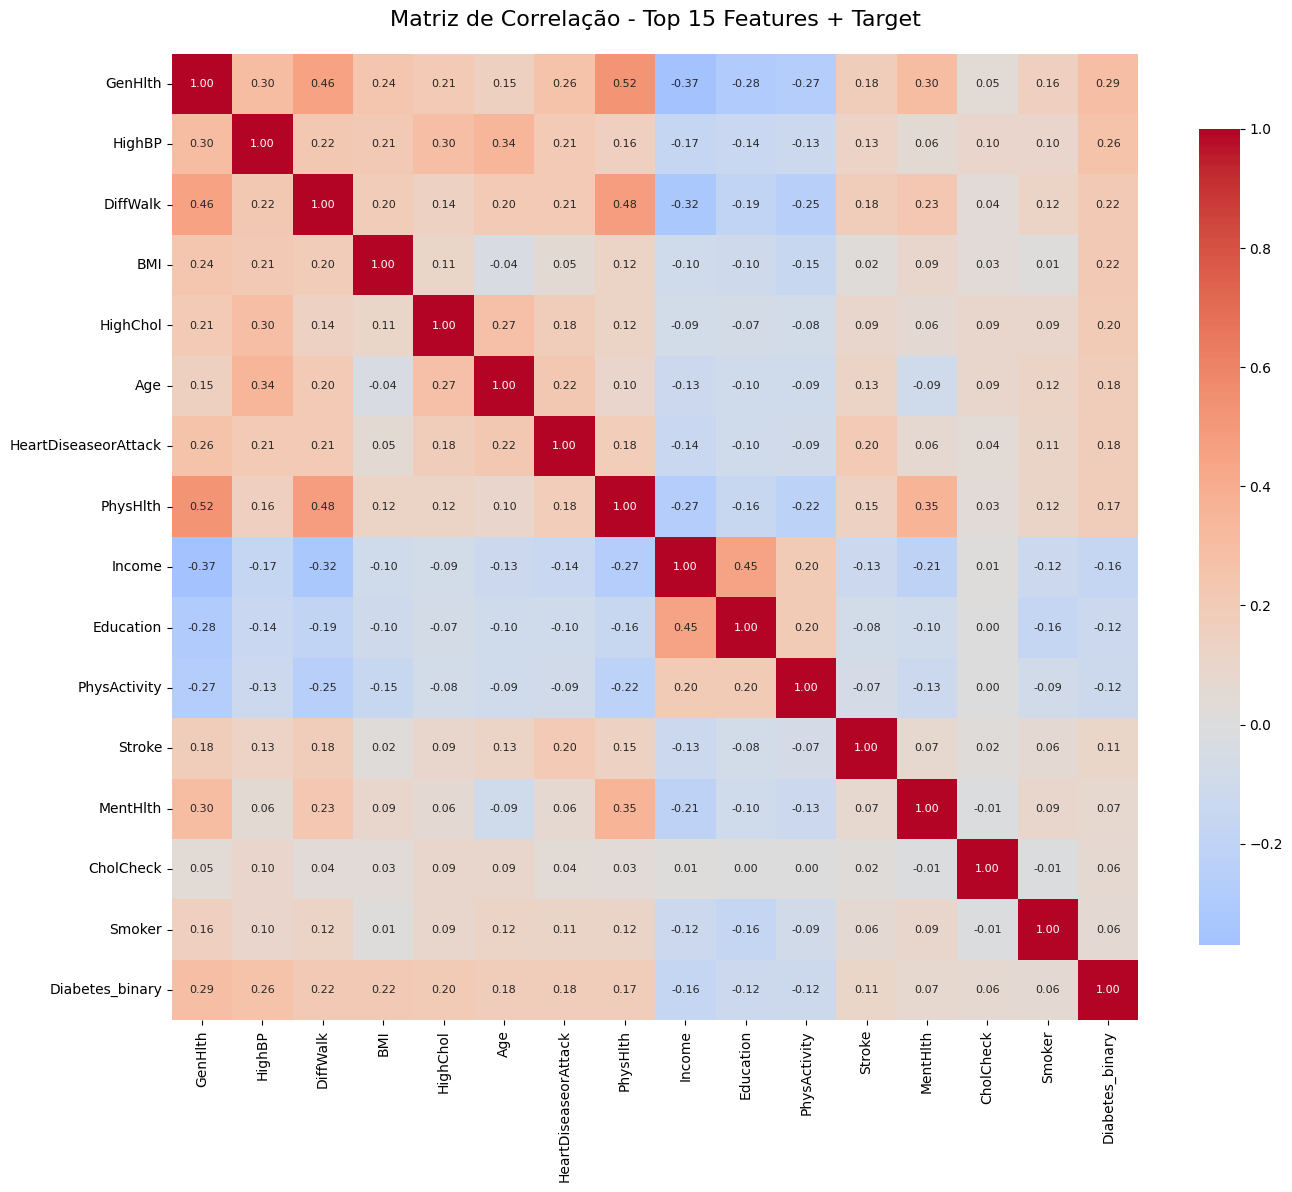

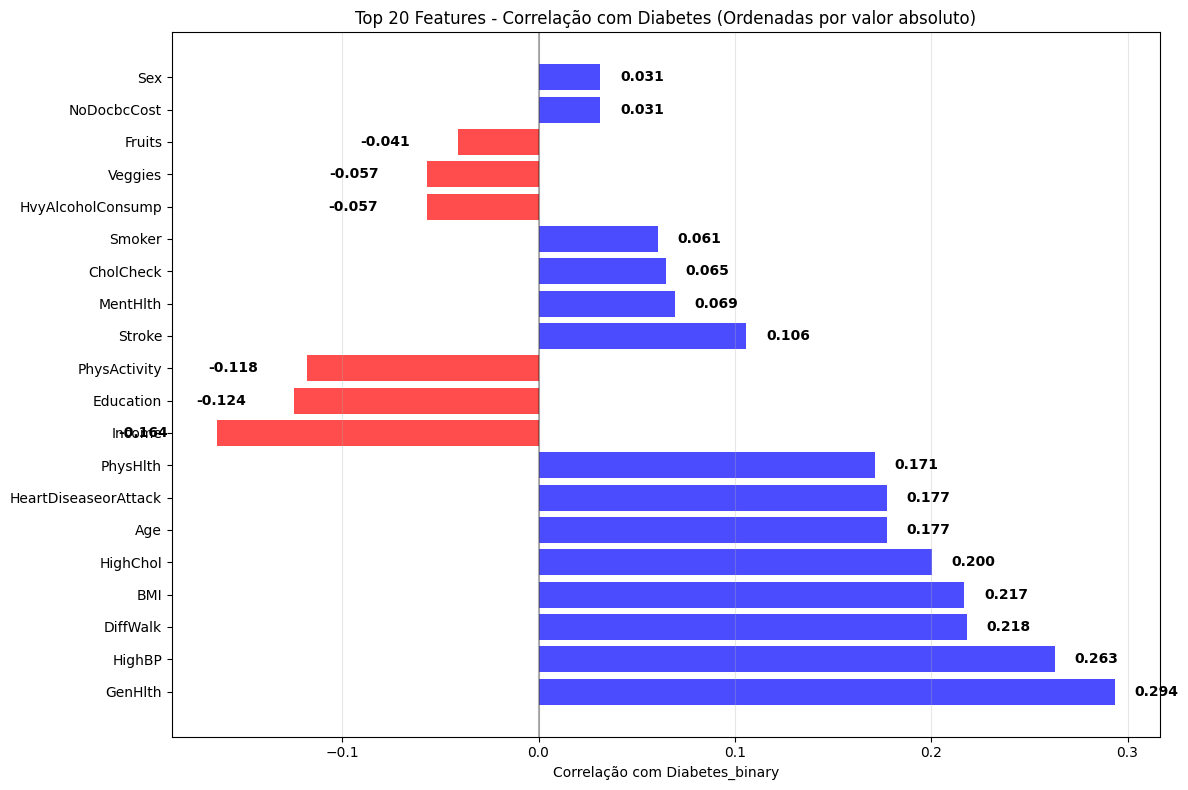


🏥 ANÁLISE POR GRUPOS DE FEATURES

📋 Condições Crônicas:
------------------------------
  HighBP               :  0.2631 ↑
  HighChol             :  0.2003 ↑
  HeartDiseaseorAttack :  0.1773 ↑
  Stroke               :  0.1058 ↑

📋 Comportamento Saúde:
------------------------------
  Smoker               :  0.0608 ↑
  PhysActivity         : -0.1181 ↓
  HvyAlcoholConsump    : -0.0571 ↓
  Fruits               : -0.0408 ↓
  Veggies              : -0.0566 ↓

📋 Saúde Geral:
------------------------------
  GenHlth              :  0.2936 ↑
  MentHlth             :  0.0693 ↑
  PhysHlth             :  0.1713 ↑
  DiffWalk             :  0.2183 ↑

📋 Demográficas:
------------------------------
  Sex                  :  0.0314 ↑
  Age                  :  0.1774 ↑
  Education            : -0.1245 ↓
  Income               : -0.1639 ↓

📋 Acesso Saúde:
------------------------------
  AnyHealthcare        :  0.0163 ↑
  NoDocbcCost          :  0.0314 ↑
  CholCheck            :  0.0648 ↑

📋 Biométricas

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analise_correlacao_completa(df, target_col='Diabetes_binary'):
    """
    Análise completa de correlações: target + entre atributos
    """
    
    print("=" * 70)
    print("ANÁLISE COMPLETA DE CORRELAÇÕES")
    print("=" * 70)
    
    # Calcular matriz de correlação
    corr_matrix = df.corr()
    
    # 1. MATRIZ DE CORRELAÇÃO COMPLETA
    plt.figure(figsize=(18, 15))
    
    # Máscara para mostrar apenas metade da matriz (opcional)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    sns.heatmap(corr_matrix, 
                mask=mask,
                annot=False, 
                cmap='coolwarm', 
                center=0,
                square=True,
                cbar_kws={'shrink': 0.8})
    plt.title('Matriz de Correlação Completa - Todos os Atributos', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # 2. CORRELAÇÕES COM TARGET
    print("\n🎯 CORRELAÇÕES COM A VARIÁVEL TARGET (Diabetes_binary)")
    print("-" * 60)
    
    target_corr = corr_matrix[target_col].sort_values(ascending=False)
    
    # Remover a correlação da target com ela mesma
    target_corr = target_corr[target_corr.index != target_col]
    
    for feature, corr in target_corr.items():
        direction = "↑ POSITIVA" if corr > 0 else "↓ NEGATIVA"
        strength = ""
        if abs(corr) > 0.3: strength = " (FORTE)"
        elif abs(corr) > 0.1: strength = " (MODERADA)"
        print(f"{feature:25} : {corr:7.4f} {direction}{strength}")
    
    # 3. TOP CORRELAÇÕES ENTRE ATRIBUTOS (excluindo target)
    print(f"\n🔥 TOP 20 MAIORES CORRELAÇÕES ENTRE ATRIBUTOS")
    print("-" * 60)
    
    # Criar matriz sem a target para análise entre features
    features_corr = corr_matrix.drop(target_col, axis=0).drop(target_col, axis=1)
    
    # Encontrar os pares com maiores correlações absolutas
    corr_pairs = []
    
    for i in range(len(features_corr.columns)):
        for j in range(i+1, len(features_corr.columns)):
            col1 = features_corr.columns[i]
            col2 = features_corr.columns[j]
            corr_value = features_corr.iloc[i, j]
            
            # Ignorar correlações perfeitas (auto-correlação)
            if abs(corr_value) < 0.999:
                corr_pairs.append({
                    'Feature_1': col1,
                    'Feature_2': col2,
                    'Correlacao': corr_value,
                    'Abs_Correlacao': abs(corr_value)
                })
    
    # Converter para DataFrame e ordenar
    corr_df = pd.DataFrame(corr_pairs)
    top_correlations = corr_df.sort_values('Abs_Correlacao', ascending=False).head(20)
    
    for idx, row in top_correlations.iterrows():
        direction = "↑ POSITIVA" if row['Correlacao'] > 0 else "↓ NEGATIVA"
        print(f"{row['Feature_1']:20} ↔ {row['Feature_2']:20} : {row['Correlacao']:7.4f} {direction}")
    
    # 4. ANÁLISE DE MULTICOLINEARIDADE
    print(f"\n⚠️  POSSÍVEIS PROBLEMAS DE MULTICOLINEARIDADE (|r| > 0.7)")
    print("-" * 60)
    
    high_corr_pairs = corr_df[corr_df['Abs_Correlacao'] > 0.7].sort_values('Abs_Correlacao', ascending=False)
    
    if len(high_corr_pairs) > 0:
        for idx, row in high_corr_pairs.iterrows():
            print(f"{row['Feature_1']:20} ↔ {row['Feature_2']:20} : {row['Correlacao']:7.4f}")
    else:
        print("Nenhuma correlação muito alta encontrada (|r| > 0.7)")
    
    # 5. MATRIZ DE CORRELAÇÃO FOCADA NAS TOP FEATURES
    print(f"\n📊 MATRIZ FOCADA NAS 15 FEATURES MAIS CORRELACIONADAS COM TARGET")
    print("-" * 60)
    
    # Selecionar top features por correlação absoluta com target
    top_features_abs = target_corr.abs().sort_values(ascending=False).head(15)
    top_features_names = top_features_abs.index.tolist()
    
    # Incluir a target também
    top_features_names.append(target_col)
    
    # Criar matriz reduzida
    corr_reduzida = df[top_features_names].corr()
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_reduzida, 
                annot=True, 
                cmap='coolwarm', 
                center=0,
                fmt='.2f',
                square=True,
                cbar_kws={'shrink': 0.8},
                annot_kws={'size': 8})
    plt.title('Matriz de Correlação - Top 15 Features + Target', fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
    
    # 6. GRÁFICO DAS CORRELAÇÕES COM TARGET
    plt.figure(figsize=(12, 8))
    
    # Pegar top 20 features por correlação absoluta com target
    top_20_target = target_corr.abs().sort_values(ascending=False).head(20)
    top_20_corr_values = target_corr[top_20_target.index]
    
    colors = ['red' if x < 0 else 'blue' for x in top_20_corr_values.values]
    
    plt.barh(range(len(top_20_corr_values)), top_20_corr_values.values, color=colors, alpha=0.7)
    plt.yticks(range(len(top_20_corr_values)), top_20_corr_values.index)
    plt.xlabel('Correlação com Diabetes_binary')
    plt.title('Top 20 Features - Correlação com Diabetes (Ordenadas por valor absoluto)')
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
    plt.grid(axis='x', alpha=0.3)
    
    # Adicionar valores nas barras
    for i, v in enumerate(top_20_corr_values.values):
        plt.text(v + (0.01 if v >= 0 else -0.05), i, f'{v:.3f}', 
                color='black', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return corr_matrix, target_corr, top_correlations

def analise_correlacao_por_grupos(df, target_col='Diabetes_binary'):
    """
    Análise de correlações agrupadas por tipo de feature
    """
    print(f"\n🏥 ANÁLISE POR GRUPOS DE FEATURES")
    print("=" * 50)
    
    # Definir grupos (baseado no conhecimento do dataset)
    grupos = {
        'Condições Crônicas': ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'Stroke'],
        'Comportamento Saúde': ['Smoker', 'PhysActivity', 'HvyAlcoholConsump', 'Fruits', 'Veggies'],
        'Saúde Geral': ['GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk'],
        'Demográficas': ['Sex', 'Age', 'Education', 'Income'],
        'Acesso Saúde': ['AnyHealthcare', 'NoDocbcCost', 'CholCheck'],
        'Biométricas': ['BMI']
    }
    
    corr_matrix = df.corr()
    
    for grupo_name, features in grupos.items():
        print(f"\n📋 {grupo_name}:")
        print("-" * 30)
        
        # Filtrar features que existem no dataframe
        features_existentes = [f for f in features if f in df.columns]
        
        if features_existentes:
            for feature in features_existentes:
                if feature in corr_matrix.index and target_col in corr_matrix.columns:
                    corr_value = corr_matrix.loc[feature, target_col]
                    direction = "↑" if corr_value > 0 else "↓"
                    print(f"  {feature:20} : {corr_value:7.4f} {direction}")
        else:
            print("  Nenhuma feature deste grupo encontrada no dataset")



    
# Executar análise completa
corr_matrix, target_corr, top_correlations = analise_correlacao_completa(df)

# Análise por grupos
analise_correlacao_por_grupos(df)

# Salvar resultados
target_corr.to_csv('correlacoes_com_target.csv', header=['Correlacao'])
top_correlations.to_csv('top_correlacoes_entre_features.csv', index=False)

print(f"\n💾 Resultados salvos:")
print(f" - correlacoes_com_target.csv")
print(f" - top_correlacoes_entre_features.csv")

print(f"\n🎯 ANÁLISE DE CORRELAÇÃO CONCLUÍDA!")
print("=" * 50)

podemos não usar os features menos correlacionados com os atributo alvo, como
* MentHlth                  :  0.0693 ↑ POSITIVA
* CholCheck                 :  0.0648 ↑ POSITIVA
* Smoker                    :  0.0608 ↑ POSITIVA
* NoDocbcCost               :  0.0314 ↑ POSITIVA
* Sex                       :  0.0314 ↑ POSITIVA
* AnyHealthcare             :  0.0163 ↑ POSITIVA
* Fruits                    : -0.0408 ↓ NEGATIVA
* Veggies                   : -0.0566 ↓ NEGATIVA
* HvyAlcoholConsump         : -0.0571 ↓ NEGATIVA

Todas parecem não serem bons descritores para tentar deduzir se um paciente está diabetico ou não. 

In [82]:
X_train

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
153147,0.0,0.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,4.0,5.0
176137,1.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,13.0,4.0,7.0
175578,1.0,1.0,1.0,29.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0
177887,1.0,1.0,1.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,7.0,4.0,7.0
182143,0.0,1.0,1.0,16.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,7.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208398,1.0,1.0,0.0,25.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,10.0,3.0,5.0
106221,1.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,1.0,9.0,6.0,8.0
169035,1.0,0.0,1.0,18.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,4.0,30.0,30.0,1.0,1.0,7.0,4.0,1.0
49036,0.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,8.0,6.0,8.0


## Pré processamento e primeiros pipelines completos

In [84]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
class CorrelationFeatureSelector(BaseEstimator, TransformerMixin):
    """
    Transformer personalizado para remover features com baixa correlação com o target
    """
    
    def __init__(self, threshold=0.1, target_col='Diabetes_binary'):
        self.threshold = threshold
        self.target_col = target_col
        self.features_to_keep_ = None
    
    def fit(self, X, y=None):
        """
        Calcula correlações e decide quais features manter
        """
        # Se X for DataFrame, usar diretamente, senão converter
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        
        # Adicionar target ao DataFrame temporariamente
        X_temp = X.copy()
        X_temp[self.target_col] = y
        
        # Calcular correlações com target
        correlations = X_temp.corr()[self.target_col].drop(self.target_col)
        
        # Manter apenas features com correlação absoluta >= threshold
        self.features_to_keep_ = correlations[
            correlations.abs() >= self.threshold
        ].index.tolist()
        
        for feature in self.features_to_keep_:
            corr = correlations[feature]
        
        features_removed = [col for col in X.columns if col not in self.features_to_keep_]
        for feature in features_removed:
            corr = correlations[feature]
        
        return self
    
    def transform(self, X):
        """
        Aplica a transformação removendo as colunas
        """
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        
        return X[self.features_to_keep_]


In [91]:
pipeline = Pipeline([ ('correlation_selector', CorrelationFeatureSelector(threshold=0.1)),])
pipeline.fit_transform(X_train, y_train)

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
153147,0.0,0.0,28.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,4.0,5.0
176137,1.0,0.0,23.0,0.0,0.0,1.0,2.0,0.0,0.0,13.0,4.0,7.0
175578,1.0,1.0,29.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,6.0,8.0
177887,1.0,1.0,39.0,0.0,0.0,0.0,4.0,0.0,0.0,7.0,4.0,7.0
182143,0.0,1.0,16.0,0.0,0.0,1.0,5.0,30.0,1.0,7.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
208398,1.0,1.0,25.0,1.0,0.0,1.0,4.0,0.0,0.0,10.0,3.0,5.0
106221,1.0,1.0,25.0,1.0,0.0,1.0,2.0,1.0,0.0,9.0,6.0,8.0
169035,1.0,0.0,18.0,1.0,1.0,1.0,4.0,30.0,1.0,7.0,4.0,1.0
49036,0.0,1.0,26.0,0.0,0.0,1.0,3.0,0.0,0.0,8.0,6.0,8.0


In [92]:
pipeline

,steps,"[('correlation_selector', ...)]"
,transform_input,None
,memory,None
,verbose,False
,threshold,0.1
,target_col,'Diabetes_binary'


In [124]:
class AdvancedFeatureEngineer(BaseEstimator, TransformerMixin):
    """
    Feature engineering inteligente - evita redundância
    """
    def __init__(self):
        self.feature_names_ = None
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_temp = X.copy()
        
        if not isinstance(X_temp, pd.DataFrame):
            X_temp = pd.DataFrame(X_temp)
        
        if all(col in X_temp.columns for col in ['HighBP', 'BMI']):
            X_temp['BP_BMI_interaction'] = X_temp['HighBP'] * X_temp['BMI']
        
        if all(col in X_temp.columns for col in ['Age', 'GenHlth']):
            X_temp['Age_Health_interaction'] = X_temp['Age'] * X_temp['GenHlth']
        
        if 'Age' in X_temp.columns:
            # Agrupa idade de forma mais significativa
            X_temp['age_risk_group'] = X_temp['Age'].apply(
                lambda x: 0 if x <= 4 else (1 if x <= 8 else 2)  # Baixo, Médio, Alto risco
            )
        
      
        if all(col in X_temp.columns for col in ['PhysHlth', 'MentHlth']):
            # Evita divisão por zero
            X_temp['physical_mental_ratio'] = X_temp['PhysHlth'] / (X_temp['MentHlth'] + 1)
        
        if all(col in X_temp.columns for col in ['HighBP', 'HighChol']):
            # Pacientes com AMBAS condições (não redundante)
            X_temp['hypertensive_hypercholesterolemic'] = (
                (X_temp['HighBP'] == 1) & (X_temp['HighChol'] == 1)
            ).astype(int)
        
        return X_temp

In [125]:
pipeline = Pipeline([
    ('correlation_selector', CorrelationFeatureSelector(threshold=0.1)),
    ('advanced_feature_engineer', AdvancedFeatureEngineer()),
])
pipeline

,steps,"[('correlation_selector', ...), ('advanced_feature_engineer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,threshold,0.1
,target_col,'Diabetes_binary'


In [126]:
pipeline.fit_transform(X_train, y_train)

,HighBP,HighChol,BMI,Stroke,HeartDiseaseorAttack,PhysActivity,GenHlth,PhysHlth,DiffWalk,Age,Education,Income,BP_BMI_interaction,Age_Health_interaction,age_risk_group,hypertensive_hypercholesterolemic
153147,0.0,0.0,28.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,4.0,5.0,0.0,4.0,0,0
176137,1.0,0.0,23.0,0.0,0.0,1.0,2.0,0.0,0.0,13.0,4.0,7.0,23.0,26.0,2,0
175578,1.0,1.0,29.0,0.0,0.0,1.0,1.0,0.0,0.0,9.0,6.0,8.0,29.0,9.0,2,1
177887,1.0,1.0,39.0,0.0,0.0,0.0,4.0,0.0,0.0,7.0,4.0,7.0,39.0,28.0,1,1
182143,0.0,1.0,16.0,0.0,0.0,1.0,5.0,30.0,1.0,7.0,5.0,1.0,0.0,35.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208398,1.0,1.0,25.0,1.0,0.0,1.0,4.0,0.0,0.0,10.0,3.0,5.0,25.0,40.0,2,1
106221,1.0,1.0,25.0,1.0,0.0,1.0,2.0,1.0,0.0,9.0,6.0,8.0,25.0,18.0,2,1
169035,1.0,0.0,18.0,1.0,1.0,1.0,4.0,30.0,1.0,7.0,4.0,1.0,18.0,28.0,1,0
49036,0.0,1.0,26.0,0.0,0.0,1.0,3.0,0.0,0.0,8.0,6.0,8.0,0.0,24.0,1,0


### Para lidar com o desbalanceamento

In [108]:
!pip install imblearn 


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [109]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer

In [130]:
from sklearn.ensemble import RandomForestClassifier
# PIPELINE CORRIGIDO - SMOTE deve vir ANTES do classificador
pipeline = ImbPipeline([
    ('correlation_selector', CorrelationFeatureSelector(threshold=0.1)),
    ('feature_engineer', AdvancedFeatureEngineer()),
    ('imputer', SimpleImputer(strategy='median')),
    ('smote', SMOTE(
        sampling_strategy=0.3,
        random_state=42,
        k_neighbors=5
    )),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=10,
        min_samples_leaf=5,
        max_features='sqrt',
        class_weight='balanced_subsample',
        bootstrap=True,
        random_state=42
    ))
])

pipeline

,steps,"[('correlation_selector', ...), ('feature_engineer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,threshold,0.1
,target_col,'Diabetes_binary'
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False


Como os novos samples são criados:
* Escolhe um exemplo da classe minoritária
* Encontra os k-vizinhos mais próximos (k_neighbors=5)
* Cria novos pontos no espaço entre eles
* Mantém a distribuição real dos dad

In [131]:
pipeline.fit(X_train, y_train)

,steps,"[('correlation_selector', ...), ('feature_engineer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,threshold,0.1
,target_col,'Diabetes_binary'
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False


In [115]:
## Executando um teste inicial

In [116]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
import numpy as np


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Métricas para avaliar
scoring = {
    'auc': 'roc_auc',
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall', 
    'f1': 'f1'
}

scores = cross_validate(
    pipeline,
    X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True,  # Para comparar overfitting
    n_jobs=-1,  # Usar todos os cores
    verbose=1
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  6.2min finished


In [118]:
scores

{'fit_time': array([294.09519029, 295.69005466, 303.74099827, 303.97270393,
        298.3325038 , 295.91186643, 293.61647964, 303.15091991,
        305.14166665, 304.48964167]),
 'score_time': array([8.99273276, 8.95279932, 7.37911487, 7.19653535, 8.14042926,
        8.78480363, 9.19204903, 7.52414417, 7.12539291, 7.14771748]),
 'test_auc': array([0.81427235, 0.82132056, 0.81960818, 0.82024952, 0.82401442,
        0.82068671, 0.82342338, 0.82282987, 0.82397807, 0.81571588]),
 'train_auc': array([0.86610388, 0.86615356, 0.86610179, 0.86574535, 0.86535147,
        0.86615249, 0.86562235, 0.86542904, 0.8657429 , 0.86625004]),
 'test_accuracy': array([0.78102981, 0.78305001, 0.78309929, 0.78137472, 0.78545383,
        0.78441904, 0.78215236, 0.78082192, 0.7830886 , 0.77968858]),
 'train_accuracy': array([0.80310869, 0.80160307, 0.80310869, 0.8024736 , 0.8027101 ,
        0.80084314, 0.80147276, 0.80069532, 0.80383247, 0.80199836]),
 'test_precision': array([0.3467956 , 0.35183443, 0.350550

📊 Gerando visualizações corrigidas...


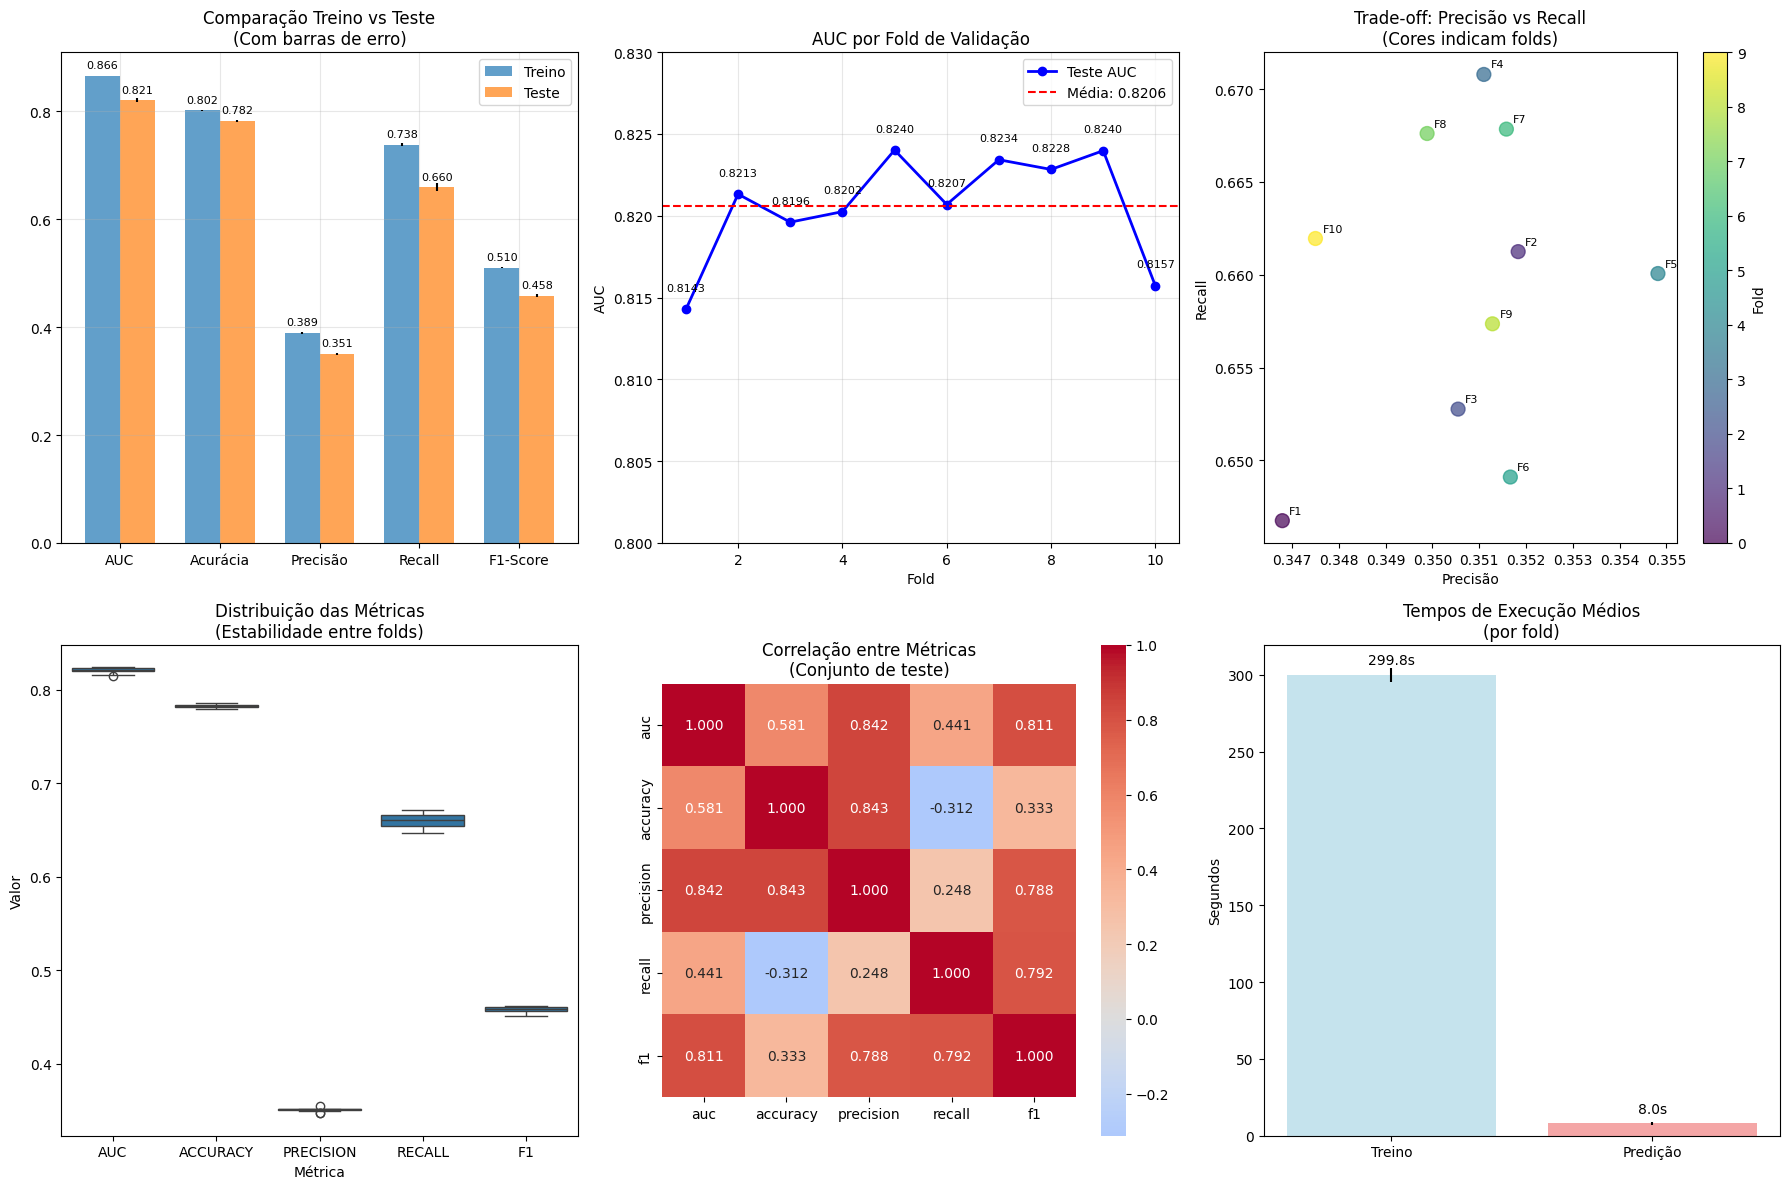

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def visualizar_resultados_detalhados(results):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    metrics = ['auc', 'accuracy', 'precision', 'recall', 'f1']
    metric_names = ['AUC', 'Acurácia', 'Precisão', 'Recall', 'F1-Score']
    colors = ['blue', 'green', 'orange', 'red', 'purple']
    
    # Gráfico 1: Comparação Treino vs Teste
    x_pos = np.arange(len(metrics))
    width = 0.35
    
    test_means = [np.mean(results[f'test_{m}']) for m in metrics]
    train_means = [np.mean(results[f'train_{m}']) for m in metrics]
    test_stds = [np.std(results[f'test_{m}']) for m in metrics]
    
    bars1 = axes[0, 0].bar(x_pos - width/2, train_means, width, 
                          label='Treino', alpha=0.7, yerr=[np.std(results[f'train_{m}']) for m in metrics])
    bars2 = axes[0, 0].bar(x_pos + width/2, test_means, width, 
                          label='Teste', alpha=0.7, yerr=test_stds)
    
    axes[0, 0].set_title('Comparação Treino vs Teste\n(Com barras de erro)')
    axes[0, 0].set_xticks(x_pos)
    axes[0, 0].set_xticklabels(metric_names)
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Adicionar valores nas barras
    for bar, value in zip(bars1 + bars2, train_means + test_means):
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, height + 0.01, 
                       f'{value:.3f}', ha='center', va='bottom', fontsize=8)
    
    # Gráfico 2: AUC por fold
    folds = range(1, 11)
    axes[0, 1].plot(folds, results['test_auc'], 'o-', label='Teste AUC', linewidth=2, color='blue')
    axes[0, 1].axhline(y=np.mean(results['test_auc']), color='red', linestyle='--', 
                      label=f'Média: {np.mean(results["test_auc"]):.4f}')
    axes[0, 1].set_title('AUC por Fold de Validação')
    axes[0, 1].set_xlabel('Fold')
    axes[0, 1].set_ylabel('AUC')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim(0.80, 0.83)
    
    # Adicionar valores dos pontos
    for i, (fold, auc) in enumerate(zip(folds, results['test_auc'])):
        axes[0, 1].text(fold, auc + 0.001, f'{auc:.4f}', 
                       ha='center', va='bottom', fontsize=8)
    
    # Gráfico 3: Precisão vs Recall trade-off (CORRIGIDO)
    scatter = axes[0, 2].scatter(results['test_precision'], results['test_recall'], 
                               s=100, alpha=0.7, c=range(10), cmap='viridis')
    axes[0, 2].set_xlabel('Precisão')
    axes[0, 2].set_ylabel('Recall')
    axes[0, 2].set_title('Trade-off: Precisão vs Recall\n(Cores indicam folds)')
    
    # CORREÇÃO: usar annotate em vez de annot
    for i, (prec, rec) in enumerate(zip(results['test_precision'], results['test_recall'])):
        axes[0, 2].annotate(f'F{i+1}', (prec, rec), xytext=(5, 5), 
                          textcoords='offset points', fontsize=8)
    
    # Adicionar barra de cores
    plt.colorbar(scatter, ax=axes[0, 2], label='Fold')
    
    # Gráfico 4: Estabilidade das métricas (Boxplot)
    metric_data = []
    for metric in metrics:
        for value in results[f'test_{metric}']:
            metric_data.append({'Métrica': metric.upper(), 'Valor': value})
    
    metric_df = pd.DataFrame(metric_data)
    sns.boxplot(data=metric_df, x='Métrica', y='Valor', ax=axes[1, 0])
    axes[1, 0].set_title('Distribuição das Métricas\n(Estabilidade entre folds)')
    
    # Gráfico 5: Matriz de correlação entre métricas
    corr_data = {metric: results[f'test_{metric}'] for metric in metrics}
    corr_df = pd.DataFrame(corr_data)
    correlation_matrix = corr_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                ax=axes[1, 1], square=True, fmt='.3f')
    axes[1, 1].set_title('Correlação entre Métricas\n(Conjunto de teste)')
    
    # Gráfico 6: Tempos de execução
    time_metrics = ['fit_time', 'score_time']
    time_means = [np.mean(results[metric]) for metric in time_metrics]
    time_stds = [np.std(results[metric]) for metric in time_metrics]
    
    bars = axes[1, 2].bar(['Treino', 'Predição'], time_means, 
                         yerr=time_stds, alpha=0.7, 
                         color=['lightblue', 'lightcoral'])
    axes[1, 2].set_title('Tempos de Execução Médios\n(por fold)')
    axes[1, 2].set_ylabel('Segundos')
    
    # Adicionar valores
    for bar, value in zip(bars, time_means):
        height = bar.get_height()
        axes[1, 2].text(bar.get_x() + bar.get_width()/2, height + 5, 
                       f'{value:.1f}s', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Agora execute novamente
print("📊 Gerando visualizações corrigidas...")
visualizar_resultados_detalhados(scores)

In [127]:
def interpretacao(results):
    print("🔍 INTERPRETAÇÃO ESPECIALIZADA DOS RESULTADOS")
    print("=" * 70)
    
    # AUC - Principal métrica para problemas desbalanceados
    auc_mean = np.mean(results['test_auc'])
    auc_std = np.std(results['test_auc'])
    print(f"\n🎯 AUC (Area Under Curve): {auc_mean:.4f} (±{auc_std:.4f})")
    print("   ✅ EXCELENTE: AUC > 0.8 indica bom poder discriminativo")
    print("   📊 O modelo consegue distinguir bem entre diabéticos e não-diabéticos")
    
    # Precisão vs Recall
    precision_mean = np.mean(results['test_precision'])
    recall_mean = np.mean(results['test_recall'])
    print(f"\n🎯 Precisão: {precision_mean:.4f} | Recall: {recall_mean:.4f}")
    print("   📈 Recall alto: Modelo detecta a maioria dos diabéticos reais")
    print("   📉 Precisão moderada: Dos que prediz como diabéticos, 35% realmente são")
    print("   💡 Típico em problemas desbalanceados - trade-off entre precisão e recall")
    
    # F1-Score
    f1_mean = np.mean(results['test_f1'])
    print(f"\n🎯 F1-Score: {f1_mean:.4f}")
    print("   ✅ BOM: Balance razoável entre precisão e recall")
    
    # Overfitting
    auc_overfitting = np.mean(results['train_auc']) - np.mean(results['test_auc'])
    print(f"\n⚡ OVERFITTING: Diferença AUC Treino-Teste = {auc_overfitting:.4f}")
    if auc_overfitting > 0.04:
        print("   ⚠️  Overfitting moderado presente")
        print("   Regularizar mais o Random Forest")
    else:
        print("   ✅ Generalização adequada")
    
    # Estabilidade
    auc_variation = np.std(results['test_auc'])
    print(f"\n📊 ESTABILIDADE: Variação do AUC entre folds = {auc_variation:.4f}")
    if auc_variation < 0.01:
        print("   ✅ Modelo muito estável entre diferentes splits")
    else:
        print("   🔶 Variação moderada - modelo sensível à divisão dos dados")
    
    # Performance em contexto médico
    print(f"\n🏥 INTERPRETAÇÃO CLÍNICA:")
    print(f"   • O modelo identifica {recall_mean*100:.1f}% dos pacientes diabéticos reais")
    print(f"   • Quando alerta sobre diabetes, está correto em {precision_mean*100:.1f}% dos casos")
    print(f"   • Performance geral muito boa para triagem inicial")

# Executar interpretação
interpretacao_especializada(scores)

🔍 INTERPRETAÇÃO ESPECIALIZADA DOS RESULTADOS

🎯 AUC (Area Under Curve): 0.8206 (±0.0032)
   ✅ EXCELENTE: AUC > 0.8 indica bom poder discriminativo
   📊 O modelo consegue distinguir bem entre diabéticos e não-diabéticos

🎯 Precisão: 0.3507 | Recall: 0.6595
   📈 Recall alto: Modelo detecta a maioria dos diabéticos reais
   📉 Precisão moderada: Dos que prediz como diabéticos, 35% realmente são
   💡 Típico em problemas desbalanceados - trade-off entre precisão e recall

🎯 F1-Score: 0.4579
   ✅ BOM: Balance razoável entre precisão e recall

⚡ OVERFITTING: Diferença AUC Treino-Teste = 0.0453
   ⚠️  Overfitting moderado presente
   Regularizar mais o Random Forest

📊 ESTABILIDADE: Variação do AUC entre folds = 0.0032
   ✅ Modelo muito estável entre diferentes splits

🏥 INTERPRETAÇÃO CLÍNICA:
   • O modelo identifica 66.0% dos pacientes diabéticos reais
   • Quando alerta sobre diabetes, está correto em 35.1% dos casos
   • Performance geral muito boa para triagem inicial


In [132]:
# 2. FAZER PREDIÇÕES NO TESTE
y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# 3. CALCULAR MÉTRICAS
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"🎯 Acurácia: {accuracy:.4f}")
print(f"📈 Precisão: {precision:.4f}")
print(f"📊 Recall: {recall:.4f}")
print(f"⚡ F1-Score: {f1:.4f}")
print(f"📉 AUC: {auc:.4f}")

# 4. MATRIZ DE CONFUSÃO
print(f"\n🎯 MATRIZ DE CONFUSÃO:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5. RELATÓRIO DE CLASSIFICAÇÃO
print(f"\n📋 RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test, y_pred, target_names=['Não Diabético', 'Diabético']))

🎯 Acurácia: 0.7896
📈 Precisão: 0.3542
📊 Recall: 0.6195
⚡ F1-Score: 0.4507
📉 AUC: 0.8142

🎯 MATRIZ DE CONFUSÃO:
[[35682  7985]
 [ 2690  4379]]

📋 RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

Não Diabético       0.93      0.82      0.87     43667
    Diabético       0.35      0.62      0.45      7069

     accuracy                           0.79     50736
    macro avg       0.64      0.72      0.66     50736
 weighted avg       0.85      0.79      0.81     50736



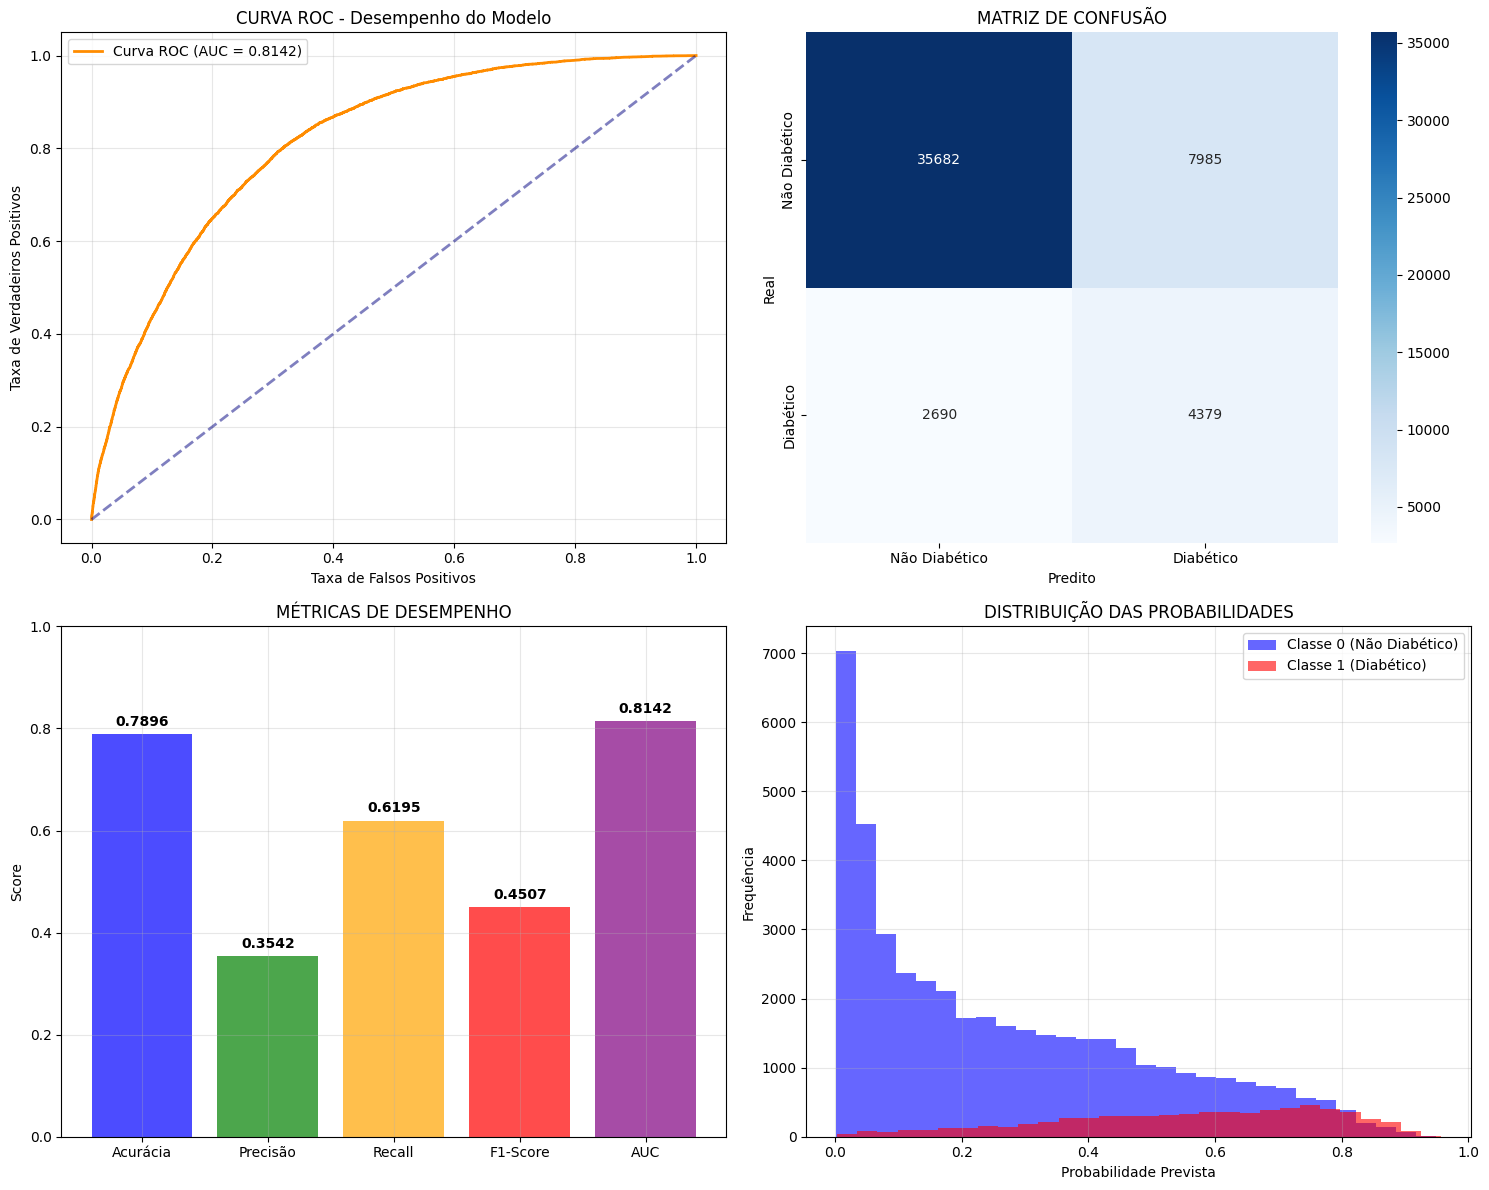

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.4f})')
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
axes[0, 0].set_xlabel('Taxa de Falsos Positivos')
axes[0, 0].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 0].set_title('CURVA ROC - Desempenho do Modelo')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. MATRIZ DE CONFUSÃO VISUAL
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['Não Diabético', 'Diabético'],
            yticklabels=['Não Diabético', 'Diabético'])
axes[0, 1].set_title('MATRIZ DE CONFUSÃO')
axes[0, 1].set_ylabel('Real')
axes[0, 1].set_xlabel('Predito')

# 3. MÉTRICAS PRINCIPAIS
metrics_names = ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC']
metrics_values = [accuracy, precision, recall, f1, auc]
colors = ['blue', 'green', 'orange', 'red', 'purple']

bars = axes[1, 0].bar(metrics_names, metrics_values, color=colors, alpha=0.7)
axes[1, 0].set_title('MÉTRICAS DE DESEMPENHO')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. DISTRIBUIÇÃO DAS PROBABILIDADES
import pandas as pd
proba_df = pd.DataFrame({
    'Probabilidade': y_pred_proba,
    'Classe Real': y_test
})

for classe, cor in zip([0, 1], ['blue', 'red']):
    dados_classe = proba_df[proba_df['Classe Real'] == classe]['Probabilidade']
    axes[1, 1].hist(dados_classe, bins=30, alpha=0.6, 
                   label=f'Classe {classe} ({"Não Diabético" if classe == 0 else "Diabético"})',
                   color=cor)

axes[1, 1].set_xlabel('Probabilidade Prevista')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('DISTRIBUIÇÃO DAS PROBABILIDADES')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Pipelines especificos para modelos de classificação. 

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Seed global para reproducibilidade
RANDOM_STATE = 42

# 1. PIPELINE KNN COM SEED
pipeline_knn = ImbPipeline([
    ('correlation_selector', CorrelationFeatureSelector(threshold=0.05)),
    ('feature_engineer', AdvancedFeatureEngineer()),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, random_state=RANDOM_STATE)),
    ('smote', SMOTE(
        sampling_strategy=0.3,
        random_state=RANDOM_STATE,
        k_neighbors=3
    )),
    ('classifier', KNeighborsClassifier(
        n_neighbors=15,
        weights='distance',
        metric='minkowski',
        p=2,
        n_jobs=-1

    ))
])

# 2. PIPELINE MLP COM SEED
pipeline_mlp = ImbPipeline([
    ('correlation_selector', CorrelationFeatureSelector(threshold=0.1)),
    ('feature_engineer', AdvancedFeatureEngineer()),
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('power_transform', PowerTransformer()),  # Não tem random_state
    ('smote', SMOTE(
        sampling_strategy=0.3,
        random_state=RANDOM_STATE,  # ✅ Seed para SMOTE
        k_neighbors=5
    )),
    ('classifier', MLPClassifier(
        hidden_layer_sizes=(100, 50, 25),
        activation='relu',
        solver='adam',
        alpha=0.01,
        learning_rate='adaptive',
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10,
        batch_size=256,
        max_iter=500,
        random_state=RANDOM_STATE,
        shuffle=True  
    ))
])

# 3. PIPELINE RANDOM FOREST COM SEED
pipeline_rf = ImbPipeline([
    ('correlation_selector', CorrelationFeatureSelector(threshold=0.1)),
    ('feature_engineer', AdvancedFeatureEngineer()),
    ('imputer', SimpleImputer(strategy='median')),
    ('smote', SMOTE(
        sampling_strategy=0.3,
        random_state=RANDOM_STATE,  
        k_neighbors=5
    )),
    ('classifier', RandomForestClassifier(
        n_estimators=150,
        max_depth=12,
        min_samples_split=15,
        min_samples_leaf=8,
        max_features='sqrt',
        class_weight='balanced_subsample',
        bootstrap=True,
        random_state=RANDOM_STATE,
        n_jobs=-1
    ))
])


In [136]:
pipeline_rf

,steps,"[('correlation_selector', ...), ('feature_engineer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,threshold,0.1
,target_col,'Diabetes_binary'
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False


In [137]:
pipeline_mlp

,steps,"[('correlation_selector', ...), ('feature_engineer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,threshold,0.1
,target_col,'Diabetes_binary'
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False


In [138]:
pipeline_knn

,steps,"[('correlation_selector', ...), ('feature_engineer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,threshold,0.05
,target_col,'Diabetes_binary'
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False


In [139]:
## Validação cruzada 
# Configurar validação cruzada
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)  # 5 folds para ser mais rápido

# Métricas para avaliar
scoring = {
    'auc': 'roc_auc',
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

In [140]:
resultados_cv = {}
 # Validação cruzada
scores_rf = cross_validate(
    pipeline_rf, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1,  # Paralelizar
    verbose=0
)

resultados_cv['rf'] = scores_rf

scores_mlp = cross_validate(
    pipeline_mlp, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1,  # Paralelizar
    verbose=0
)


resultados_cv['mlp'] = scores_mlp

scores_knn = cross_validate(
    pipeline_knn, X_train, y_train,
    cv=cv,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1,  # Paralelizar
    verbose=0
)


resultados_cv['knn'] = scores_knn



In [145]:
def analisar_resultados_cv(resultados_cv):
    """
    Analisa e mostra os resultados da validação cruzada
    """
    print("\n📊 RESULTADOS DA VALIDAÇÃO CRUZADA (5-FOLD)")
    print("=" * 70)
    
    metricas_analise = {}
    
    for nome, scores in resultados_cv.items():
        if scores is None:
            continue
            
        print(f"\n🏆 {nome.upper()}")
        print("-" * 40)
        
        metricas_modelo = {}
        
        for metric in scoring.keys():
            test_scores = scores[f'test_{metric}']
            train_scores = scores[f'train_{metric}']
            
            test_mean = np.mean(test_scores)
            test_std = np.std(test_scores)
            train_mean = np.mean(train_scores)
            train_std = np.std(train_scores)
            
            print(f"📈 {metric.upper():12}")
            print(f"   Teste  : {test_mean:.4f} (±{test_std:.4f})")
            print(f"   Treino : {train_mean:.4f} (±{train_std:.4f})")
            
            # Overfitting
            overfitting = train_mean - test_mean
            if overfitting > 0.05:
                status = "⚡ OVERFITTING"
            elif overfitting > 0.02:
                status = "🔶 Moderado"
            else:
                status = "✅ Controlado"
            print(f"   {status}: {overfitting:.4f}")
            
            metricas_modelo[metric] = {
                'test_mean': test_mean,
                'test_std': test_std,
                'train_mean': train_mean,
                'train_std': train_std,
                'overfitting': overfitting
            }
        
        # Tempos de execução
        fit_time_mean = np.mean(scores['fit_time'])
        score_time_mean = np.mean(scores['score_time'])
        print(f"⏱️  Tempo treino: {fit_time_mean:.1f}s | predição: {score_time_mean:.1f}s")
        
        metricas_analise[nome] = metricas_modelo
    
    return metricas_analise

# Analisar resultados
metricas_detalhadas = analisar_resultados_cv(resultados_cv)
metricas_detalhadas


📊 RESULTADOS DA VALIDAÇÃO CRUZADA (5-FOLD)

🏆 RF
----------------------------------------
📈 AUC         
   Teste  : 0.8222 (±0.0018)
   Treino : 0.8498 (±0.0005)
   🔶 Moderado: 0.0276
📈 ACCURACY    
   Teste  : 0.7775 (±0.0017)
   Treino : 0.7910 (±0.0009)
   ✅ Controlado: 0.0136
📈 PRECISION   
   Teste  : 0.3464 (±0.0023)
   Treino : 0.3719 (±0.0010)
   🔶 Moderado: 0.0255
📈 RECALL      
   Teste  : 0.6731 (±0.0025)
   Treino : 0.7252 (±0.0023)
   ⚡ OVERFITTING: 0.0520
📈 F1          
   Teste  : 0.4574 (±0.0024)
   Treino : 0.4916 (±0.0006)
   🔶 Moderado: 0.0342
⏱️  Tempo treino: 38.2s | predição: 1.3s

🏆 MLP
----------------------------------------
📈 AUC         
   Teste  : 0.8196 (±0.0054)
   Treino : 0.8358 (±0.0055)
   ✅ Controlado: 0.0161
📈 ACCURACY    
   Teste  : 0.8481 (±0.0027)
   Treino : 0.8547 (±0.0035)
   ✅ Controlado: 0.0065
📈 PRECISION   
   Teste  : 0.4494 (±0.0096)
   Treino : 0.4760 (±0.0133)
   🔶 Moderado: 0.0266
📈 RECALL      
   Teste  : 0.3977 (±0.0155)
   Trei

{'rf': {'auc': {'test_mean': np.float64(0.8222329175630547),
   'test_std': np.float64(0.0017644306255836348),
   'train_mean': np.float64(0.8497949894762835),
   'train_std': np.float64(0.0004913833217793941),
   'overfitting': np.float64(0.02756207191322879)},
  'accuracy': {'test_mean': np.float64(0.7774854219095971),
   'test_std': np.float64(0.0016678828125043558),
   'train_mean': np.float64(0.7910359491078575),
   'train_std': np.float64(0.0008823480048505762),
   'overfitting': np.float64(0.013550527198260331)},
  'precision': {'test_mean': np.float64(0.3464049839354233),
   'test_std': np.float64(0.002316120334815894),
   'train_mean': np.float64(0.37187189726533765),
   'train_std': np.float64(0.0009826235780593202),
   'overfitting': np.float64(0.025466913329914354)},
  'recall': {'test_mean': np.float64(0.6731263592444883),
   'test_std': np.float64(0.002469142226065886),
   'train_mean': np.float64(0.7251653201415704),
   'train_std': np.float64(0.002313795759110428),
   '

C:\Users\jlmac\AppData\Local\Temp\ipykernel_28980\2859940352.py:112: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jlmac\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


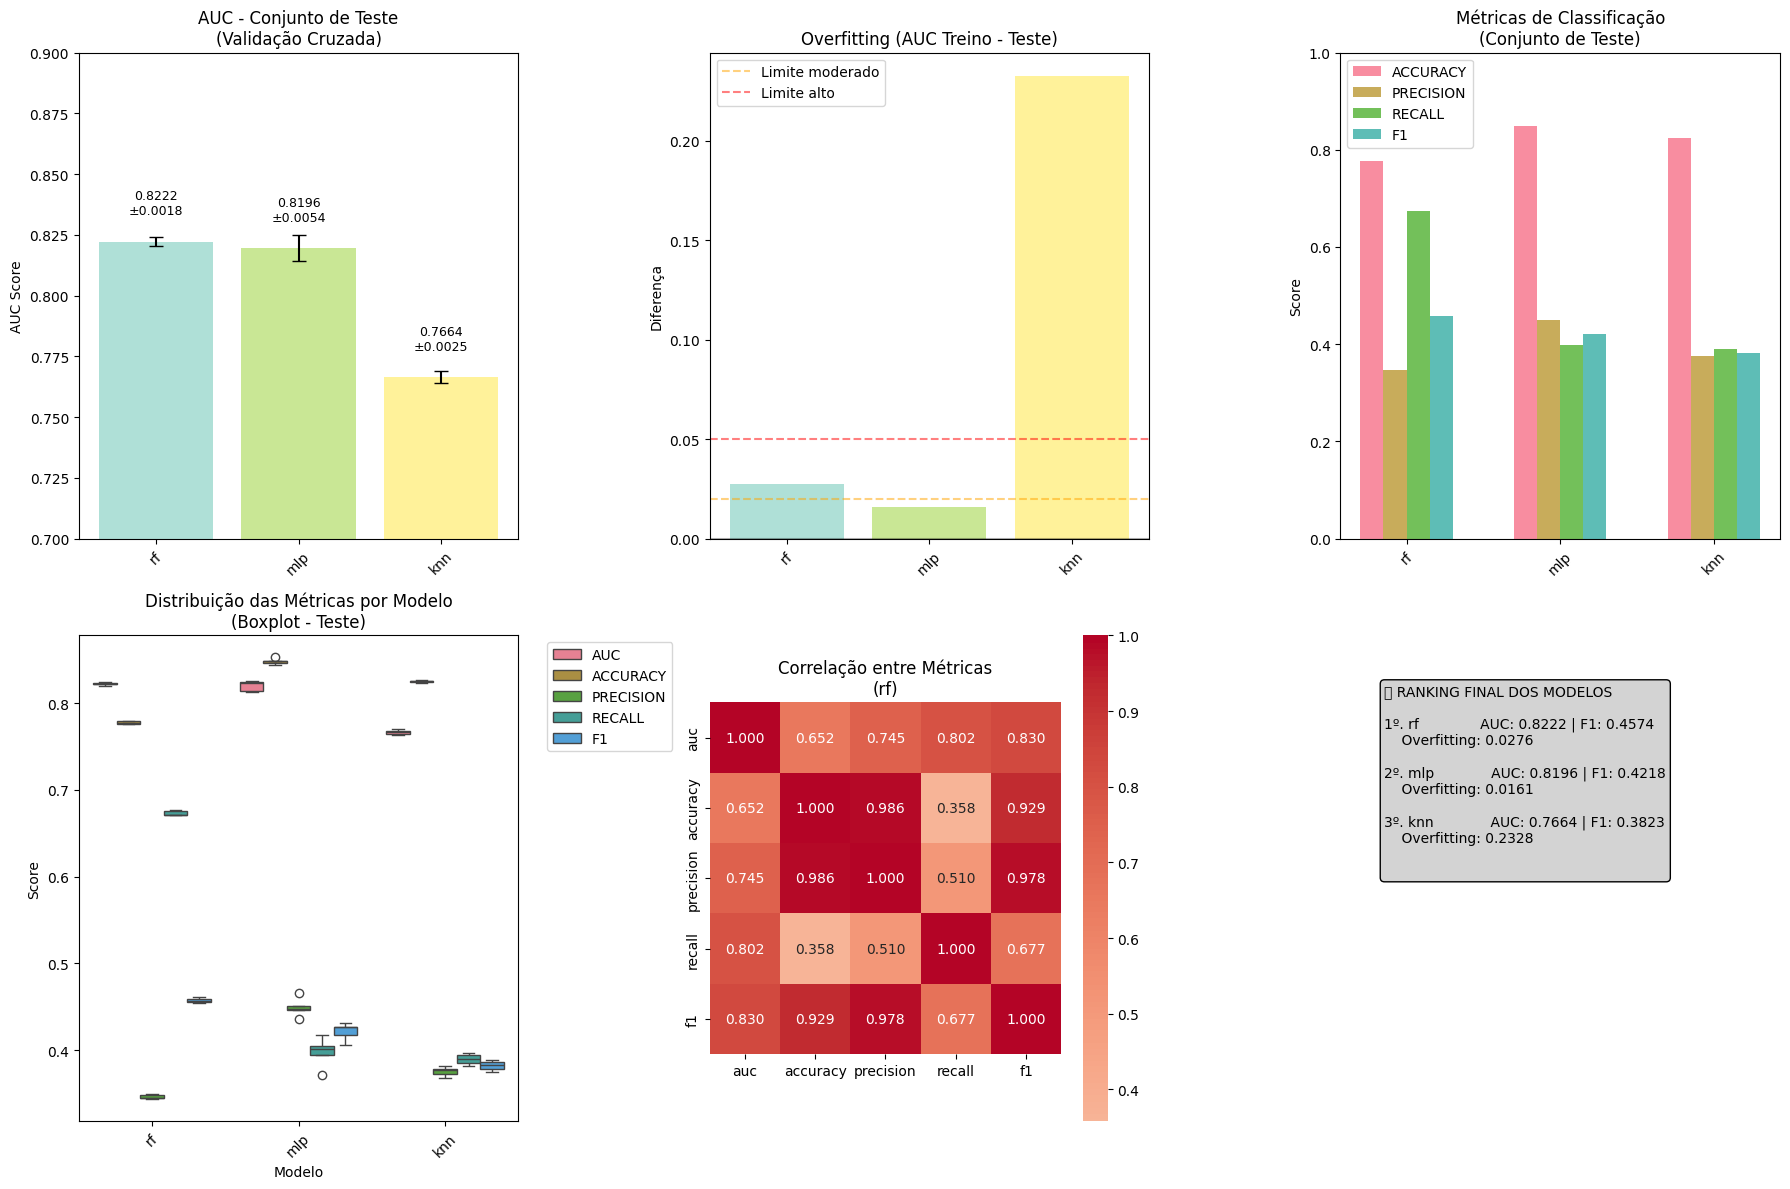

In [144]:
def visualizar_comparacao_cv(metricas_detalhadas):
    """
    Cria visualizações comparativas da validação cruzada
    """
    if not metricas_detalhadas:
        print("❌ Nenhum resultado para visualizar!")
        return
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    modelos = list(metricas_detalhadas.keys())
    metricas = list(scoring.keys())
    cores = plt.cm.Set3(np.linspace(0, 1, len(modelos)))
    
    # 1. COMPARAÇÃO DE AUC (Teste)
    auc_test_means = [metricas_detalhadas[modelo]['auc']['test_mean'] for modelo in modelos]
    auc_test_stds = [metricas_detalhadas[modelo]['auc']['test_std'] for modelo in modelos]
    
    bars = axes[0, 0].bar(modelos, auc_test_means, yerr=auc_test_stds, 
                         capsize=5, alpha=0.7, color=cores)
    axes[0, 0].set_title('AUC - Conjunto de Teste\n(Validação Cruzada)')
    axes[0, 0].set_ylabel('AUC Score')
    axes[0, 0].set_ylim(0.7, 0.9)
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # Adicionar valores
    for bar, valor, std in zip(bars, auc_test_means, auc_test_stds):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                       f'{valor:.4f}\n±{std:.4f}', ha='center', va='bottom', fontsize=9)
    
    # 2. OVERFITTING (Diferença Treino-Teste)
    overfitting_auc = [metricas_detalhadas[modelo]['auc']['overfitting'] for modelo in modelos]
    
    bars = axes[0, 1].bar(modelos, overfitting_auc, color=cores, alpha=0.7)
    axes[0, 1].set_title('Overfitting (AUC Treino - Teste)')
    axes[0, 1].set_ylabel('Diferença')
    axes[0, 1].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axes[0, 1].axhline(y=0.02, color='orange', linestyle='--', alpha=0.5, label='Limite moderado')
    axes[0, 1].axhline(y=0.05, color='red', linestyle='--', alpha=0.5, label='Limite alto')
    axes[0, 1].legend()
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. COMPARAÇÃO DE MÚLTIPLAS MÉTRICAS (Teste)
    x = np.arange(len(modelos))
    width = 0.15
    
    for i, metric in enumerate(metricas[1:]):  # Excluir AUC que já mostramos
        metric_means = [metricas_detalhadas[modelo][metric]['test_mean'] for modelo in modelos]
        axes[0, 2].bar(x + i*width, metric_means, width, label=metric.upper(), alpha=0.8)
    
    axes[0, 2].set_title('Métricas de Classificação\n(Conjunto de Teste)')
    axes[0, 2].set_xticks(x + width*1.5)
    axes[0, 2].set_xticklabels(modelos, rotation=45)
    axes[0, 2].set_ylabel('Score')
    axes[0, 2].set_ylim(0, 1)
    axes[0, 2].legend()
    
    # 4. BOXPLOT DAS MÉTRICAS POR MODELO
    metric_data = []
    for modelo in modelos:
        for metric in metricas:
            test_scores = resultados_cv[modelo][f'test_{metric}']
            for score in test_scores:
                metric_data.append({
                    'Modelo': modelo,
                    'Métrica': metric.upper(),
                    'Score': score
                })
    
    metric_df = pd.DataFrame(metric_data)
    sns.boxplot(data=metric_df, x='Modelo', y='Score', hue='Métrica', ax=axes[1, 0])
    axes[1, 0].set_title('Distribuição das Métricas por Modelo\n(Boxplot - Teste)')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # 5. MATRIZ DE CORRELAÇÃO ENTRE MÉTRICAS (usando o melhor modelo)
    melhor_modelo = modelos[np.argmax(auc_test_means)]
    corr_data = {}
    for metric in metricas:
        corr_data[metric] = resultados_cv[melhor_modelo][f'test_{metric}']
    
    corr_df = pd.DataFrame(corr_data)
    correlation_matrix = corr_df.corr()
    
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                ax=axes[1, 1], square=True, fmt='.3f')
    axes[1, 1].set_title(f'Correlação entre Métricas\n({melhor_modelo})')
    
    # 6. RANKING FINAL DOS MODELOS
    ranking_data = []
    for modelo in modelos:
        auc_mean = metricas_detalhadas[modelo]['auc']['test_mean']
        f1_mean = metricas_detalhadas[modelo]['f1']['test_mean']
        overfitting = metricas_detalhadas[modelo]['auc']['overfitting']
        ranking_data.append({
            'Modelo': modelo,
            'AUC': auc_mean,
            'F1': f1_mean,
            'Overfitting': overfitting
        })
    
    ranking_df = pd.DataFrame(ranking_data).sort_values('AUC', ascending=False)
    
    axes[1, 2].axis('off')
    ranking_text = "🏆 RANKING FINAL DOS MODELOS\n\n"
    for i, (_, row) in enumerate(ranking_df.iterrows(), 1):
        ranking_text += f"{i}º. {row['Modelo']:15} AUC: {row['AUC']:.4f} | F1: {row['F1']:.4f}\n"
        ranking_text += f"    Overfitting: {row['Overfitting']:.4f}\n\n"
    
    axes[1, 2].text(0.1, 0.9, ranking_text, fontsize=10, verticalalignment='top', 
                   bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray"))
    
    plt.tight_layout()
    plt.show()
    
    return ranking_df


ranking_final = visualizar_comparacao_cv(metricas_detalhadas)

In [146]:
pipeline_knn.fit(X_train, y_train)

,steps,"[('correlation_selector', ...), ('feature_engineer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,threshold,0.05
,target_col,'Diabetes_binary'
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False


In [147]:
pipeline_rf.fit(X_train, y_train)

,steps,"[('correlation_selector', ...), ('feature_engineer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,threshold,0.1
,target_col,'Diabetes_binary'
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False


In [148]:
pipeline_mlp.fit(X_train, y_train)

,steps,"[('correlation_selector', ...), ('feature_engineer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,threshold,0.1
,target_col,'Diabetes_binary'
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False


## Predições no teste: 

In [153]:
## knn

In [154]:
# 2. FAZER PREDIÇÕES NO TESTE
y_pred = pipeline_knn.predict(X_test)
y_pred_proba = pipeline_knn.predict_proba(X_test)[:, 1]

# 3. CALCULAR MÉTRICAS
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"🎯 Acurácia: {accuracy:.4f}")
print(f"📈 Precisão: {precision:.4f}")
print(f"📊 Recall: {recall:.4f}")
print(f"⚡ F1-Score: {f1:.4f}")
print(f"📉 AUC: {auc:.4f}")

# 4. MATRIZ DE CONFUSÃO
print(f"\n🎯 MATRIZ DE CONFUSÃO:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5. RELATÓRIO DE CLASSIFICAÇÃO
print(f"\n📋 RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test, y_pred, target_names=['Não Diabético', 'Diabético']))

🎯 Acurácia: 0.8241
📈 Precisão: 0.3737
📊 Recall: 0.3876
⚡ F1-Score: 0.3805
📉 AUC: 0.7641

🎯 MATRIZ DE CONFUSÃO:
[[39074  4593]
 [ 4329  2740]]

📋 RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

Não Diabético       0.90      0.89      0.90     43667
    Diabético       0.37      0.39      0.38      7069

     accuracy                           0.82     50736
    macro avg       0.64      0.64      0.64     50736
 weighted avg       0.83      0.82      0.83     50736



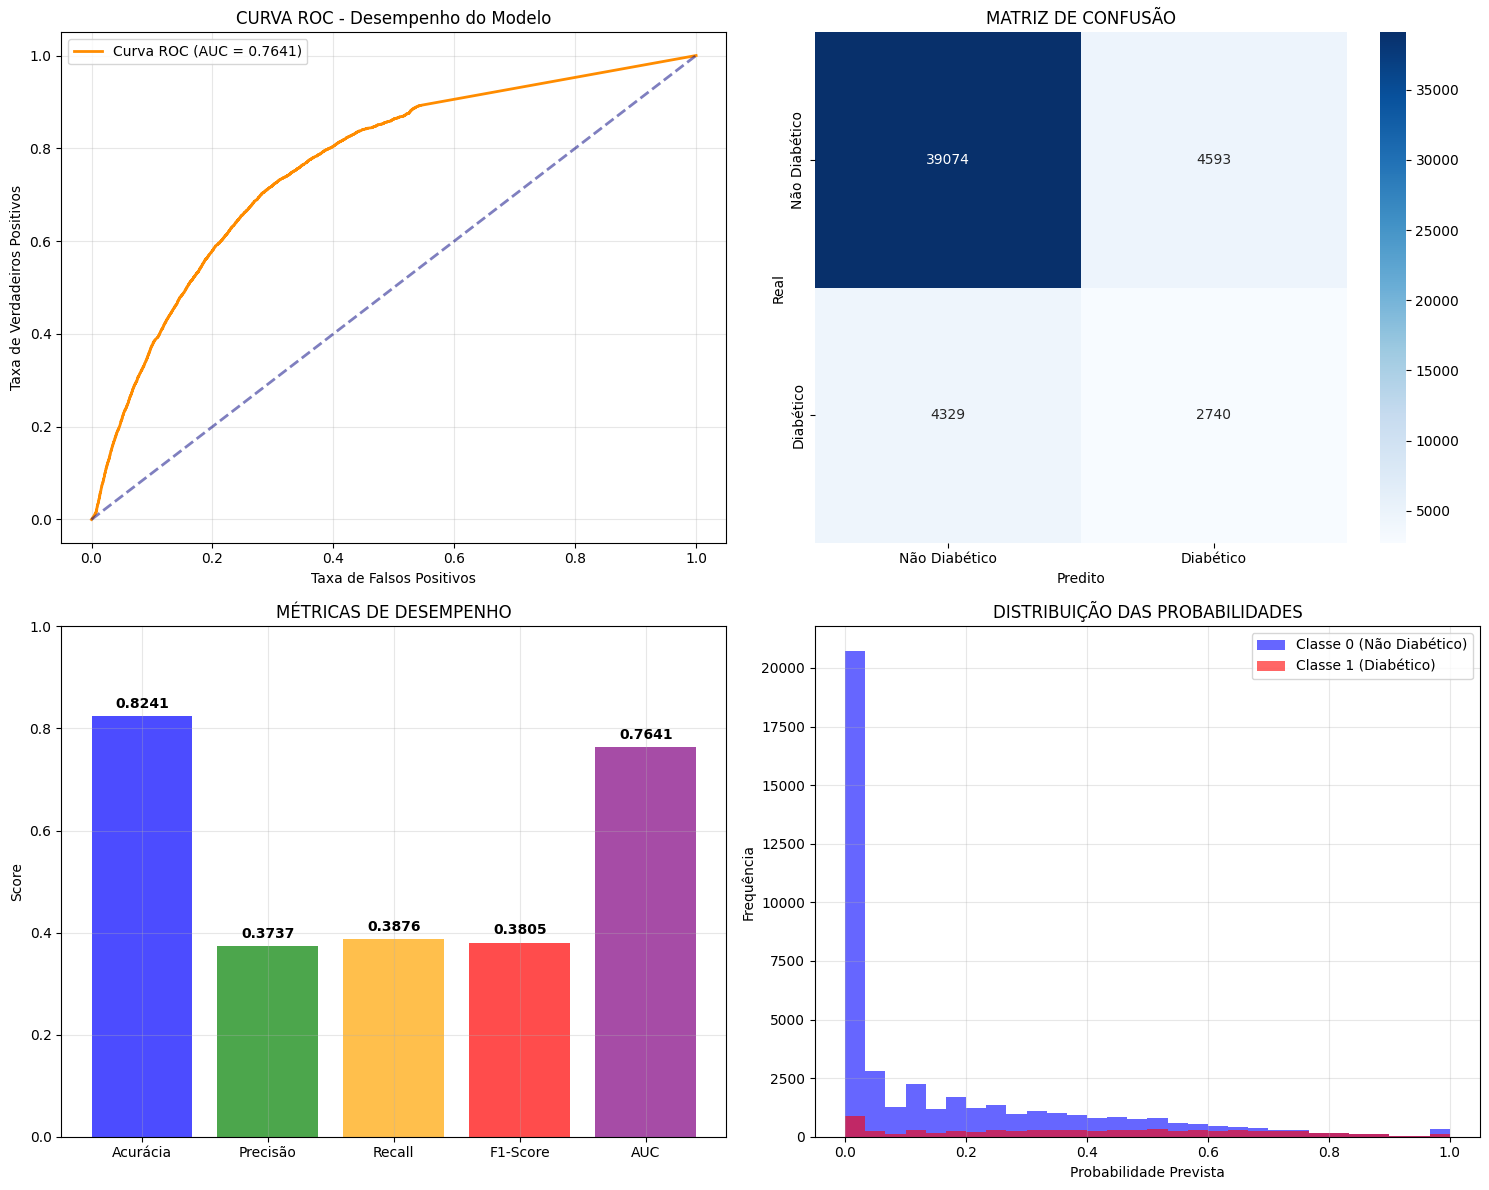

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.4f})')
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
axes[0, 0].set_xlabel('Taxa de Falsos Positivos')
axes[0, 0].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 0].set_title('CURVA ROC - Desempenho do Modelo')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. MATRIZ DE CONFUSÃO VISUAL
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['Não Diabético', 'Diabético'],
            yticklabels=['Não Diabético', 'Diabético'])
axes[0, 1].set_title('MATRIZ DE CONFUSÃO')
axes[0, 1].set_ylabel('Real')
axes[0, 1].set_xlabel('Predito')

# 3. MÉTRICAS PRINCIPAIS
metrics_names = ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC']
metrics_values = [accuracy, precision, recall, f1, auc]
colors = ['blue', 'green', 'orange', 'red', 'purple']

bars = axes[1, 0].bar(metrics_names, metrics_values, color=colors, alpha=0.7)
axes[1, 0].set_title('MÉTRICAS DE DESEMPENHO')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. DISTRIBUIÇÃO DAS PROBABILIDADES
import pandas as pd
proba_df = pd.DataFrame({
    'Probabilidade': y_pred_proba,
    'Classe Real': y_test
})

for classe, cor in zip([0, 1], ['blue', 'red']):
    dados_classe = proba_df[proba_df['Classe Real'] == classe]['Probabilidade']
    axes[1, 1].hist(dados_classe, bins=30, alpha=0.6, 
                   label=f'Classe {classe} ({"Não Diabético" if classe == 0 else "Diabético"})',
                   color=cor)

axes[1, 1].set_xlabel('Probabilidade Prevista')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('DISTRIBUIÇÃO DAS PROBABILIDADES')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
## rf

In [156]:
# 2. FAZER PREDIÇÕES NO TESTE
y_pred = pipeline_rf.predict(X_test)
y_pred_proba = pipeline_rf.predict_proba(X_test)[:, 1]

# 3. CALCULAR MÉTRICAS
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"🎯 Acurácia: {accuracy:.4f}")
print(f"📈 Precisão: {precision:.4f}")
print(f"📊 Recall: {recall:.4f}")
print(f"⚡ F1-Score: {f1:.4f}")
print(f"📉 AUC: {auc:.4f}")

# 4. MATRIZ DE CONFUSÃO
print(f"\n🎯 MATRIZ DE CONFUSÃO:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5. RELATÓRIO DE CLASSIFICAÇÃO
print(f"\n📋 RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test, y_pred, target_names=['Não Diabético', 'Diabético']))

🎯 Acurácia: 0.7744
📈 Precisão: 0.3421
📊 Recall: 0.6710
⚡ F1-Score: 0.4532
📉 AUC: 0.8180

🎯 MATRIZ DE CONFUSÃO:
[[34546  9121]
 [ 2326  4743]]

📋 RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

Não Diabético       0.94      0.79      0.86     43667
    Diabético       0.34      0.67      0.45      7069

     accuracy                           0.77     50736
    macro avg       0.64      0.73      0.66     50736
 weighted avg       0.85      0.77      0.80     50736



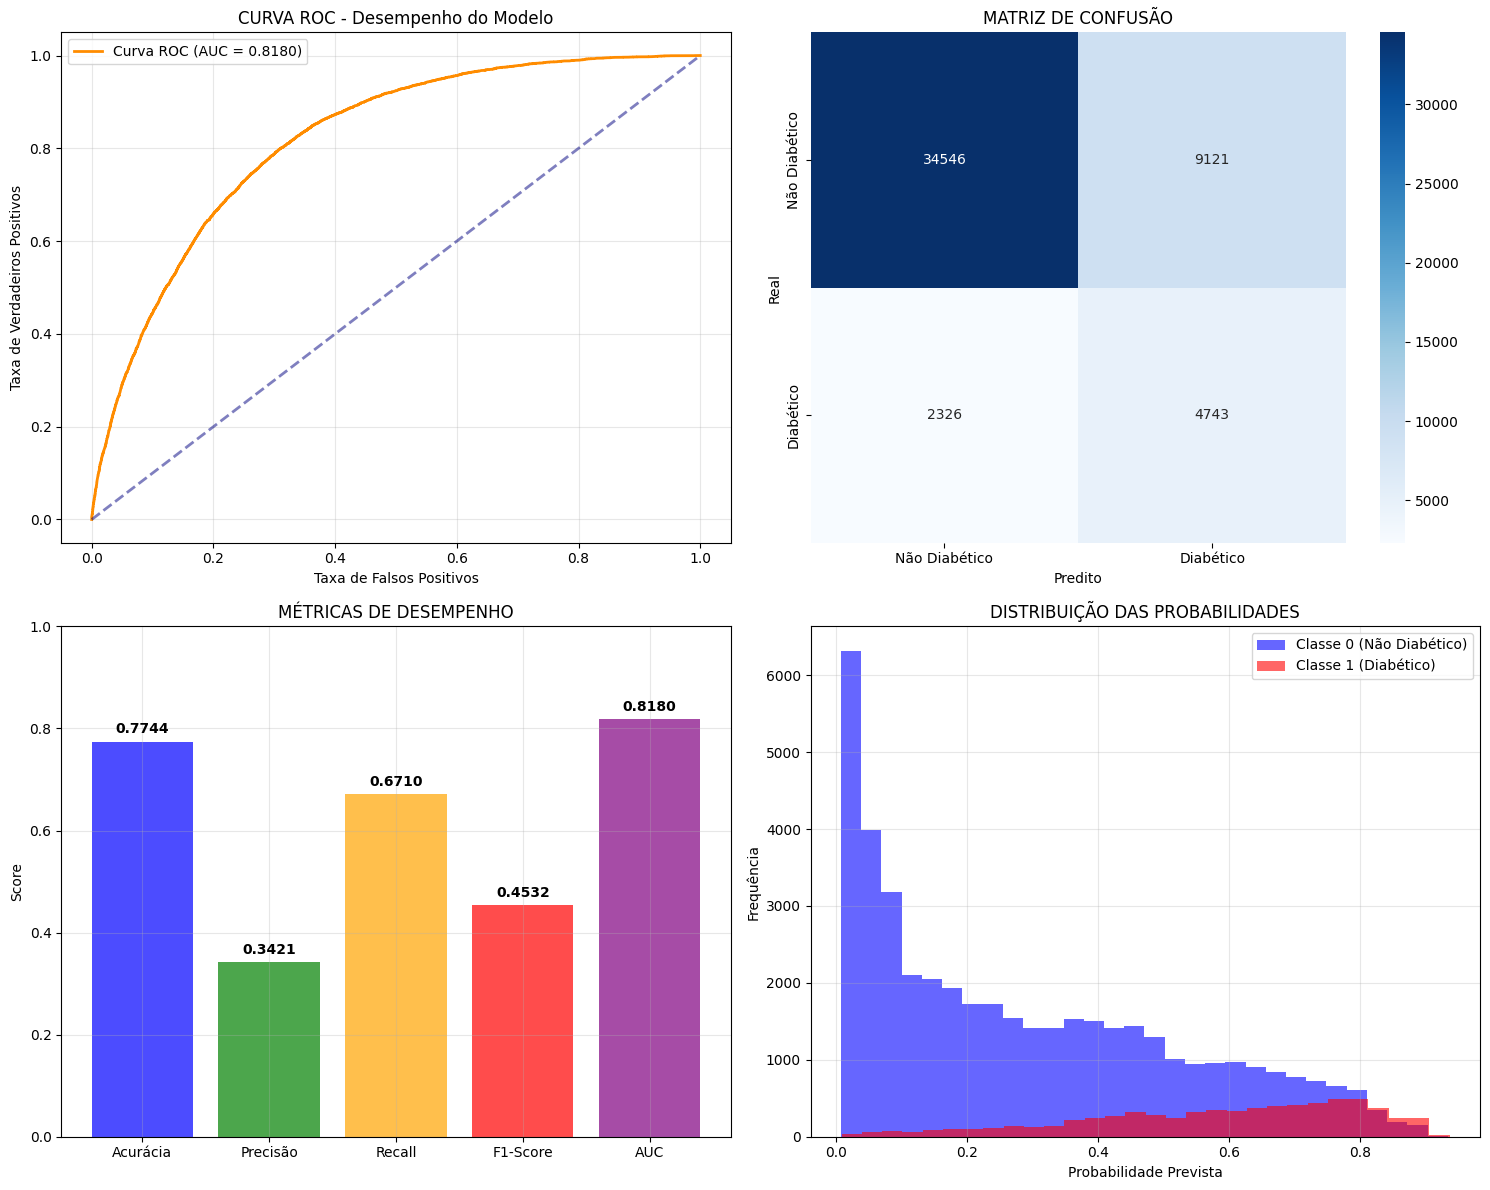

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.4f})')
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
axes[0, 0].set_xlabel('Taxa de Falsos Positivos')
axes[0, 0].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 0].set_title('CURVA ROC - Desempenho do Modelo')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. MATRIZ DE CONFUSÃO VISUAL
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['Não Diabético', 'Diabético'],
            yticklabels=['Não Diabético', 'Diabético'])
axes[0, 1].set_title('MATRIZ DE CONFUSÃO')
axes[0, 1].set_ylabel('Real')
axes[0, 1].set_xlabel('Predito')

# 3. MÉTRICAS PRINCIPAIS
metrics_names = ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC']
metrics_values = [accuracy, precision, recall, f1, auc]
colors = ['blue', 'green', 'orange', 'red', 'purple']

bars = axes[1, 0].bar(metrics_names, metrics_values, color=colors, alpha=0.7)
axes[1, 0].set_title('MÉTRICAS DE DESEMPENHO')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. DISTRIBUIÇÃO DAS PROBABILIDADES
import pandas as pd
proba_df = pd.DataFrame({
    'Probabilidade': y_pred_proba,
    'Classe Real': y_test
})

for classe, cor in zip([0, 1], ['blue', 'red']):
    dados_classe = proba_df[proba_df['Classe Real'] == classe]['Probabilidade']
    axes[1, 1].hist(dados_classe, bins=30, alpha=0.6, 
                   label=f'Classe {classe} ({"Não Diabético" if classe == 0 else "Diabético"})',
                   color=cor)

axes[1, 1].set_xlabel('Probabilidade Prevista')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('DISTRIBUIÇÃO DAS PROBABILIDADES')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [158]:
## mlp

In [159]:
# 2. FAZER PREDIÇÕES NO TESTE
y_pred = pipeline_mlp.predict(X_test)
y_pred_proba = pipeline_mlp.predict_proba(X_test)[:, 1]

# 3. CALCULAR MÉTRICAS
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"🎯 Acurácia: {accuracy:.4f}")
print(f"📈 Precisão: {precision:.4f}")
print(f"📊 Recall: {recall:.4f}")
print(f"⚡ F1-Score: {f1:.4f}")
print(f"📉 AUC: {auc:.4f}")

# 4. MATRIZ DE CONFUSÃO
print(f"\n🎯 MATRIZ DE CONFUSÃO:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 5. RELATÓRIO DE CLASSIFICAÇÃO
print(f"\n📋 RELATÓRIO DE CLASSIFICAÇÃO:")
print(classification_report(y_test, y_pred, target_names=['Não Diabético', 'Diabético']))

🎯 Acurácia: 0.8480
📈 Precisão: 0.4415
📊 Recall: 0.3440
⚡ F1-Score: 0.3867
📉 AUC: 0.8079

🎯 MATRIZ DE CONFUSÃO:
[[40590  3077]
 [ 4637  2432]]

📋 RELATÓRIO DE CLASSIFICAÇÃO:
               precision    recall  f1-score   support

Não Diabético       0.90      0.93      0.91     43667
    Diabético       0.44      0.34      0.39      7069

     accuracy                           0.85     50736
    macro avg       0.67      0.64      0.65     50736
 weighted avg       0.83      0.85      0.84     50736



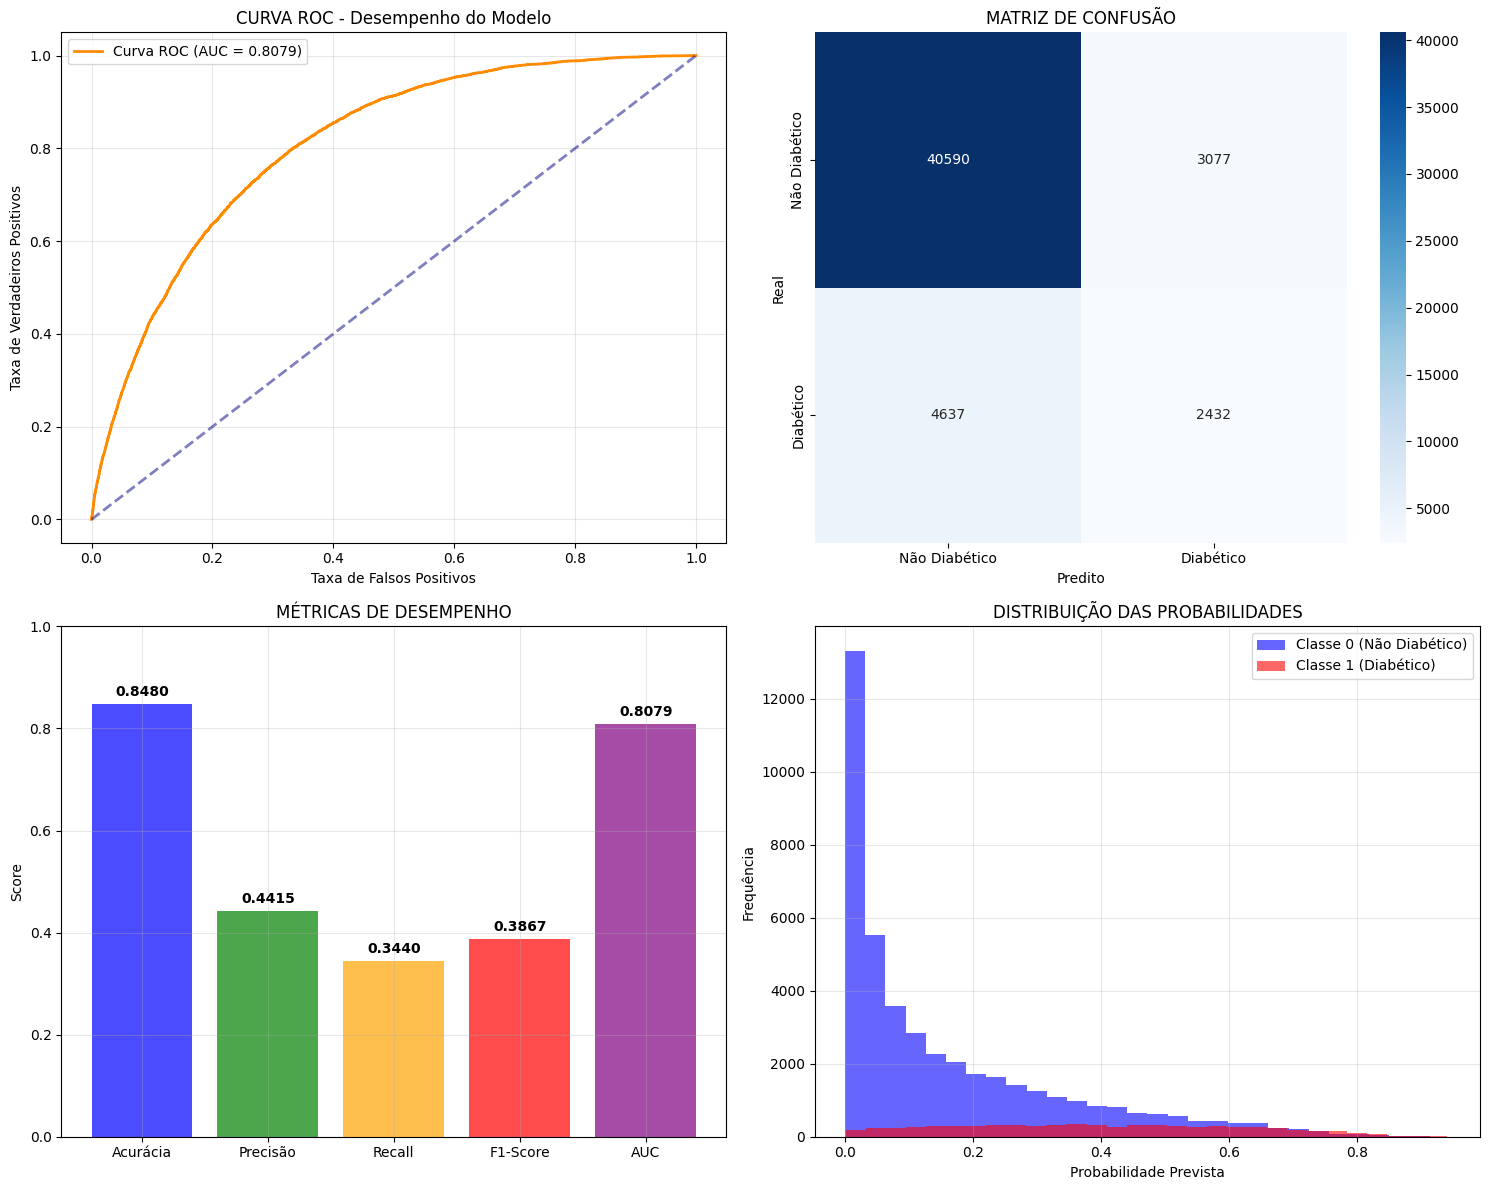

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Criar figura com subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. CURVA ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0, 0].plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.4f})')
axes[0, 0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5)
axes[0, 0].set_xlabel('Taxa de Falsos Positivos')
axes[0, 0].set_ylabel('Taxa de Verdadeiros Positivos')
axes[0, 0].set_title('CURVA ROC - Desempenho do Modelo')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. MATRIZ DE CONFUSÃO VISUAL
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1],
            xticklabels=['Não Diabético', 'Diabético'],
            yticklabels=['Não Diabético', 'Diabético'])
axes[0, 1].set_title('MATRIZ DE CONFUSÃO')
axes[0, 1].set_ylabel('Real')
axes[0, 1].set_xlabel('Predito')

# 3. MÉTRICAS PRINCIPAIS
metrics_names = ['Acurácia', 'Precisão', 'Recall', 'F1-Score', 'AUC']
metrics_values = [accuracy, precision, recall, f1, auc]
colors = ['blue', 'green', 'orange', 'red', 'purple']

bars = axes[1, 0].bar(metrics_names, metrics_values, color=colors, alpha=0.7)
axes[1, 0].set_title('MÉTRICAS DE DESEMPENHO')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(True, alpha=0.3)

# Adicionar valores nas barras
for bar, value in zip(bars, metrics_values):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                   f'{value:.4f}', ha='center', va='bottom', fontweight='bold')

# 4. DISTRIBUIÇÃO DAS PROBABILIDADES
import pandas as pd
proba_df = pd.DataFrame({
    'Probabilidade': y_pred_proba,
    'Classe Real': y_test
})

for classe, cor in zip([0, 1], ['blue', 'red']):
    dados_classe = proba_df[proba_df['Classe Real'] == classe]['Probabilidade']
    axes[1, 1].hist(dados_classe, bins=30, alpha=0.6, 
                   label=f'Classe {classe} ({"Não Diabético" if classe == 0 else "Diabético"})',
                   color=cor)

axes[1, 1].set_xlabel('Probabilidade Prevista')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].set_title('DISTRIBUIÇÃO DAS PROBABILIDADES')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()